<font color="color" face="Bedrock" size="7">
	Machine Learning Model and Data Analysis for AI-Enabled Fintech Invoice Management Aplication
</font>

> + **Name:-Prafull Nayan**<br>
> + **Roll No:-1805139**

# **Table Of Contents**


*   Importing Libraries
*   Data Collection
*   Data Preprocessing
*   Splitting Of Data in Train,Validation,Test Set
*   Exploratory Data Analysis On Train Set
*   Feature Engineering
*   Feature Selection
    + Wrapper Method
*   Model Training
      1.   XGB Regressor
      2.   Random Forest Regressor
      3.   Decision Tree Regressor
      4.   Support Vector Regressor
      5.   Linear Regression
      6.   Lasso Regression
      7.   Ridge Regression
*   HyperParameter Tuning
      1.   RandomizedSearchCV
      2.   GridSearchCV
* Model Prediction
* Model Evaluation
      1.   MSE
      2.   RMSE
      3.   R2_Score
* Comaparison between different learning Algorithms on test and Validation set
* Final Predictions on final Test data and Aging of Buckets.

# Importing Some Important Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading The Data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("highradius_final data.csv")

In [ ]:
#checking all the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45556 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
#Looking into first 10 rows of the data
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200705742,DOT foundation,2019-03-25 00:00:00,2019.0,1.928922e+09,2019-03-08,20190307,20190308,20190328.0,USD,RV,1.0,NaN,66859.77,20190308.0,NAD1,1.928922e+09,0
1,U001,200434439,BAUGH SU systems,2019-07-11 00:00:00,2019.0,1.929545e+09,2019-06-26,20190626,20190626,20190711.0,USD,RV,1.0,NaN,36196.38,20190626.0,NAA8,1.929545e+09,0
2,U001,200974851,RESTA associates,2019-04-25 00:00:00,2019.0,1.929125e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,NaN,6884.49,20190410.0,NAA8,1.929125e+09,0
3,U001,0200769623,WAL-MAR in,2019-01-15 00:00:00,2019.0,1.928567e+09,2019-01-04,20190104,20190104,20190119.0,USD,RV,1.0,NaN,21367.34,20190104.0,NAH4,1.928567e+09,0
4,U001,0200726979,BJ'S in,2019-02-07 00:00:00,2019.0,1.928657e+09,2019-01-23,20190121,20190123,20190207.0,USD,RV,1.0,NaN,14997.44,20190123.0,NAA8,1.928657e+09,0
5,U001,0200769623,WAL-MAR,2020-03-11 00:00:00,2020.0,1.930558e+09,2020-02-23,20200222,20200223,20200309.0,USD,RV,1.0,NaN,19477.41,20200223.0,NAH4,1.930558e+09,0
6,U001,200769623,WAL-MAR co,2019-05-08 00:00:00,2019.0,1.929181e+09,2019-04-22,20190420,20190422,20190507.0,USD,RV,1.0,NaN,24544.65,20190422.0,NAH4,1.929181e+09,0
7,U001,0200803720,DEC in,2019-03-08 00:00:00,2019.0,1.928929e+09,2019-03-08,20190308,20190308,20190311.0,USD,RV,1.0,NaN,3500.28,20190301.0,NAM2,1.928929e+09,0
8,U001,0200769623,WAL-MAR co,2019-07-11 00:00:00,2019.0,1.929555e+09,2019-06-28,20190628,20190628,20190713.0,USD,RV,1.0,NaN,52297.53,20190628.0,NAH4,1.929555e+09,0
9,U001,0200765011,MAINES us,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190709,20190710,20190725.0,USD,RV,1.0,NaN,52784.87,20190710.0,NAA8,1.929601e+09,0


In [ ]:
#Some statistical information of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
buisness_year,50000.0,2.019211e+03,4.083762e-01,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.020000e+03
doc_id,50000.0,2.012449e+09,2.854399e+08,1.928483e+09,1.929245e+09,1.929812e+09,1.930414e+09,9.500000e+09
document_create_date,50000.0,2.019257e+07,3.956136e+03,2.018123e+07,2.019042e+07,2.019081e+07,2.019113e+07,2.020052e+07
document_create_date.1,50000.0,2.019261e+07,3.942623e+03,2.018102e+07,2.019042e+07,2.019081e+07,2.019113e+07,2.020052e+07
due_in_date,50000.0,2.019276e+07,3.959417e+03,2.018110e+07,2.019051e+07,2.019083e+07,2.019122e+07,2.020071e+07
posting_id,50000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
area_business,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,50000.0,3.217072e+04,4.077815e+04,1.800000e+00,4.759733e+03,1.718561e+04,4.667326e+04,1.506681e+06
baseline_create_date,50000.0,2.019261e+07,3.942027e+03,2.018102e+07,2.019042e+07,2.019081e+07,2.019113e+07,2.020052e+07
invoice_id,49996.0,2.011850e+09,2.774825e+08,1.928483e+09,1.929245e+09,1.929812e+09,1.930414e+09,2.960634e+09


# Data Preprocessing

## Null Imputation

In [ ]:
# checking null values in all the columns present in the dataframe
df.isnull().sum().sort_values(ascending=False)

area_business             50000
clear_date                 4444
invoice_id                    4
business_code                 0
invoice_currency              0
cust_payment_terms            0
baseline_create_date          0
total_open_amount             0
posting_id                    0
document type                 0
due_in_date                   0
cust_number                   0
document_create_date.1        0
document_create_date          0
posting_date                  0
doc_id                        0
buisness_year                 0
name_customer                 0
isOpen                        0
dtype: int64

In [ ]:
# checking Datatypes of all the columns
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [ ]:

# Number of missing values in each column of  dataframe
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

clear_date        4444
area_business    50000
invoice_id           4
dtype: int64


In [ ]:
#percentage of missing value
missing_val_in_percentage=(missing_val_count_by_column/len(df['clear_date'])*100).sort_values(ascending=False)
missing_val_in_percentage  

area_business             100.000
clear_date                  8.888
invoice_id                  0.008
business_code               0.000
invoice_currency            0.000
cust_payment_terms          0.000
baseline_create_date        0.000
total_open_amount           0.000
posting_id                  0.000
document type               0.000
due_in_date                 0.000
cust_number                 0.000
document_create_date.1      0.000
document_create_date        0.000
posting_date                0.000
doc_id                      0.000
buisness_year               0.000
name_customer               0.000
isOpen                      0.000
dtype: float64

> + **It's advised to remove those features that uniquely identify the example. For example, if predicting user behavior, a numeric user_id column should be removed. The stated reason is that a ML Model would use that column to fit perfectly on the training set, ignoring all the other columns, resulting in a useless model.**

In [ ]:
#So invoice_id is no use to us
df['invoice_id'].value_counts()

1.929355e+09    1
1.930416e+09    1
1.929811e+09    1
1.929443e+09    1
1.930006e+09    1
               ..
1.929197e+09    1
1.928768e+09    1
1.929859e+09    1
2.960575e+09    1
1.930534e+09    1
Name: invoice_id, Length: 49996, dtype: int64

> **Above we see that *area_business column have 100 percent missing value* followed by *clear_date 8 percent* then *invoice_id have only 4 rows missing***

<AxesSubplot:>

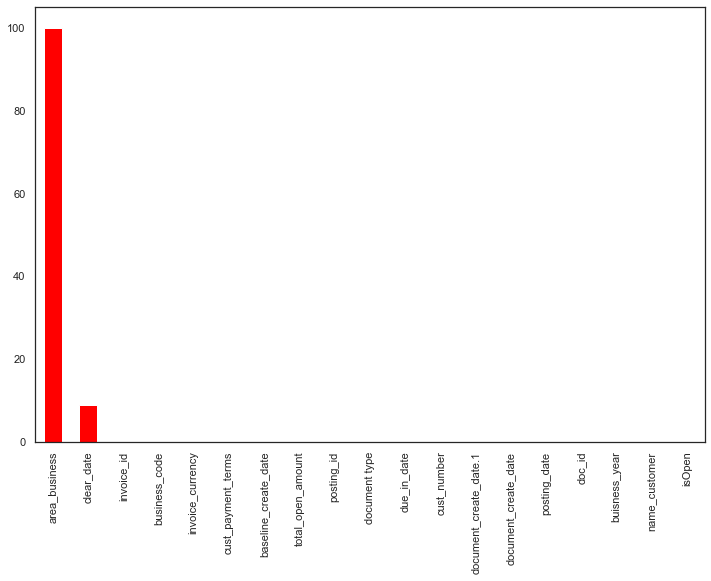

In [ ]:
# plotting the missing value in column
plt.figure(figsize=(12,8))
missing_val_in_percentage.plot(kind="bar",color="red")

## dropping columns

In [ ]:
#dropping area business column as all value in this column are missing
df.drop('area_business',axis=1,inplace=True)

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200705742,DOT foundation,2019-03-25 00:00:00,2019.0,1.928922e+09,2019-03-08,20190307,20190308,20190328.0,USD,RV,1.0,66859.77,20190308.0,NAD1,1.928922e+09,0
1,U001,200434439,BAUGH SU systems,2019-07-11 00:00:00,2019.0,1.929545e+09,2019-06-26,20190626,20190626,20190711.0,USD,RV,1.0,36196.38,20190626.0,NAA8,1.929545e+09,0
2,U001,200974851,RESTA associates,2019-04-25 00:00:00,2019.0,1.929125e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,6884.49,20190410.0,NAA8,1.929125e+09,0
3,U001,0200769623,WAL-MAR in,2019-01-15 00:00:00,2019.0,1.928567e+09,2019-01-04,20190104,20190104,20190119.0,USD,RV,1.0,21367.34,20190104.0,NAH4,1.928567e+09,0
4,U001,0200726979,BJ'S in,2019-02-07 00:00:00,2019.0,1.928657e+09,2019-01-23,20190121,20190123,20190207.0,USD,RV,1.0,14997.44,20190123.0,NAA8,1.928657e+09,0


> **We also see that invoice_id column also missing very small amount value(0.008 %),So we will drop the invoice column because invoice_id is not any us of us.**

In [ ]:
# dropping invoice_id column as it is no use of us
df.drop('invoice_id',axis=1,inplace=True)

In [ ]:
# Now again  checking  the null values in columns
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                4444
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
isOpen                       0
dtype: int64

> **Now we have column clear date which have 4444 missing values.**

> **we will now create a separate dataframe containing all the values with missing clear_date.**

> **Then we will drop the rows with missing clear_date from the main dataframe.**


In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200705742,DOT foundation,2019-03-25 00:00:00,2019.0,1.928922e+09,2019-03-08,20190307,20190308,20190328.0,USD,RV,1.0,66859.77,20190308.0,NAD1,0
1,U001,200434439,BAUGH SU systems,2019-07-11 00:00:00,2019.0,1.929545e+09,2019-06-26,20190626,20190626,20190711.0,USD,RV,1.0,36196.38,20190626.0,NAA8,0
2,U001,200974851,RESTA associates,2019-04-25 00:00:00,2019.0,1.929125e+09,2019-04-10,20190410,20190410,20190425.0,USD,RV,1.0,6884.49,20190410.0,NAA8,0
3,U001,0200769623,WAL-MAR in,2019-01-15 00:00:00,2019.0,1.928567e+09,2019-01-04,20190104,20190104,20190119.0,USD,RV,1.0,21367.34,20190104.0,NAH4,0
4,U001,0200726979,BJ'S in,2019-02-07 00:00:00,2019.0,1.928657e+09,2019-01-23,20190121,20190123,20190207.0,USD,RV,1.0,14997.44,20190123.0,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930593e+09,2020-03-04,20200303,20200304,20200319.0,USD,RV,1.0,379.49,20200304.0,NAH4,1
49996,U001,0200704045,RA corp,NaN,2020.0,1.930809e+09,2020-04-21,20200421,20200421,20200506.0,USD,RV,1.0,22656.32,20200421.0,NAA8,1
49997,U001,0200704045,RA corp,NaN,2020.0,1.930645e+09,2020-03-12,20200312,20200312,20200327.0,USD,RV,1.0,73122.46,20200312.0,NAA8,1
49998,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930778e+09,2020-04-11,20200411,20200411,20200426.0,USD,RV,1.0,3313.84,20200411.0,NAH4,1


In [ ]:
# now dataframe have only 45556 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45556 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

> 

# Converting into datetime datatype

In [ ]:
df['clear_date']=pd.to_datetime(df['clear_date'])


In [ ]:
df['posting_date']=pd.to_datetime(df['posting_date'])

> **Some Dates are in integer type so we have to also convert them in datetype datatype.**

In [ ]:
# Converting Document_create_date column to datetime datatype 

df['document_create_date']=pd.to_datetime(df['document_create_date'],format="%Y%m%d")

In [ ]:
# Converting Document_create_date.1 column to datetime datatype 

df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format="%Y%m%d")

In [ ]:
# Converting Due_in_date column to datetime datatype 

df['due_in_date']=pd.to_datetime(df['due_in_date'],format="%Y%m%d")

In [ ]:
# Converting baseline_create_date column to datetime datatype

df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format="%Y%m%d")

In [ ]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

> + **Now we make a new dataframe containing only values which have clear_date null and remove those rows from the main dataframe.**

In [ ]:
# Final test data containing clear date value null
final_test=df[df['clear_date'].isnull()]

In [ ]:
final_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
45556,U001,0200382900,J & J us,NaT,2020.0,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,105359.17,2020-04-21,NAA8,1
45557,U001,0200920735,ALBERT us,NaT,2020.0,1.930852e+09,2020-05-04,2020-05-02,2020-05-04,2020-05-19,USD,RV,1.0,153289.41,2020-05-04,NAA8,1
45558,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930802e+09,2020-04-21,2020-04-19,2020-04-21,2020-05-06,USD,RV,1.0,10513.24,2020-04-21,NAH4,1
45559,U001,0100052024,CPG trust,NaT,2020.0,1.930758e+09,2020-04-07,2020-04-07,2020-04-07,2020-06-11,USD,RV,1.0,26793.74,2020-04-07,NAGD,1
45560,U001,0200794332,COST llc,NaT,2020.0,1.930759e+09,2020-04-08,2020-04-07,2020-04-08,2020-04-23,USD,RV,1.0,37107.96,2020-04-08,NAAX,1


In [ ]:
final_test_copy=final_test.copy()

In [ ]:
final_test_copy.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
45556,U001,0200382900,J & J us,NaT,2020.0,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,105359.17,2020-04-21,NAA8,1
45557,U001,0200920735,ALBERT us,NaT,2020.0,1.930852e+09,2020-05-04,2020-05-02,2020-05-04,2020-05-19,USD,RV,1.0,153289.41,2020-05-04,NAA8,1
45558,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930802e+09,2020-04-21,2020-04-19,2020-04-21,2020-05-06,USD,RV,1.0,10513.24,2020-04-21,NAH4,1
45559,U001,0100052024,CPG trust,NaT,2020.0,1.930758e+09,2020-04-07,2020-04-07,2020-04-07,2020-06-11,USD,RV,1.0,26793.74,2020-04-07,NAGD,1
45560,U001,0200794332,COST llc,NaT,2020.0,1.930759e+09,2020-04-08,2020-04-07,2020-04-08,2020-04-23,USD,RV,1.0,37107.96,2020-04-08,NAAX,1


In [ ]:
#dropping the rows from main dataframe having clear_date as null value
df.dropna(inplace=True)

In [ ]:
#Now our data have not any null values
df.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
dtype: int64

In [ ]:
#Now we can see the columns containig dates are of datetime datatype so it will be easier now to work on them.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45556 entries, 0 to 45555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45556 non-null  object        
 1   cust_number             45556 non-null  object        
 2   name_customer           45556 non-null  object        
 3   clear_date              45556 non-null  datetime64[ns]
 4   buisness_year           45556 non-null  float64       
 5   doc_id                  45556 non-null  float64       
 6   posting_date            45556 non-null  datetime64[ns]
 7   document_create_date    45556 non-null  datetime64[ns]
 8   document_create_date.1  45556 non-null  datetime64[ns]
 9   due_in_date             45556 non-null  datetime64[ns]
 10  invoice_currency        45556 non-null  object        
 11  document type           45556 non-null  object        
 12  posting_id              45556 non-null  float6

> + **As we know that our ML Algorithms can only predict continuos values and categorical values so we can't predict datetimes that's why we have to predict the delay in payment i.e *clear_date-due_in_date*.**

> + **So if the delay comes <ins>*positive</ins>(+)* that means the customer had not clear his payment before the due_in_date.**

> + **So if the delay comes <ins>*negative</ins>(-)* that means the customer had clear his payment before the due_in_date.**

In [ ]:
# Finding the delay
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [ ]:
#checking head of delay column
df['delay'].head()

0   -3
1    0
2    0
3   -4
4    0
Name: delay, dtype: int64

In [ ]:
#Now are value is free from string
df['delay'].head()

0   -3
1    0
2    0
3   -4
4    0
Name: delay, dtype: int64

In [ ]:
# Let's find out maximum value of delay row
df[df['delay']==df['delay'].max()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
31187,U001,0200754118,ARMY,2019-09-25,2019.0,1.929921e+09,2019-09-25,2019-09-25,2019-09-25,2018-12-31,USD,RV,1.0,26.28,2018-12-16,NAM3,0,268


# Dropping Duplicate 

> + **we need to remove duplicate because, if more and more similar
features will be provided to a machine learning algorithm then it will get biased towards these
features, hence decreasing the variance of training data.**

In [ ]:
df=df.T

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df=df.T

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200705742,DOT foundation,2019-03-25,2019.0,1928921980.0,2019-03-08,2019-03-07,2019-03-08,2019-03-28,USD,RV,1.0,66859.77,2019-03-08,NAD1,0,-3
1,U001,200434439,BAUGH SU systems,2019-07-11,2019.0,1929544995.0,2019-06-26,2019-06-26,2019-06-26,2019-07-11,USD,RV,1.0,36196.38,2019-06-26,NAA8,0,0
2,U001,200974851,RESTA associates,2019-04-25,2019.0,1929125300.0,2019-04-10,2019-04-10,2019-04-10,2019-04-25,USD,RV,1.0,6884.49,2019-04-10,NAA8,0,0
3,U001,0200769623,WAL-MAR in,2019-01-15,2019.0,1928566666.0,2019-01-04,2019-01-04,2019-01-04,2019-01-19,USD,RV,1.0,21367.34,2019-01-04,NAH4,0,-4
4,U001,0200726979,BJ'S in,2019-02-07,2019.0,1928657020.0,2019-01-23,2019-01-21,2019-01-23,2019-02-07,USD,RV,1.0,14997.44,2019-01-23,NAA8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45551,U001,200820380,SMITH'S corp,2019-07-23,2019.0,1929586298.0,2019-07-07,2019-07-08,2019-07-07,2019-07-22,USD,RV,1.0,64233.60,2019-07-07,NAA8,0,1
45552,U001,0200736337,SYSCO F us,2019-05-06,2019.0,1929146754.0,2019-04-17,2019-04-15,2019-04-17,2019-05-02,USD,RV,1.0,5516.74,2019-04-17,NAA8,0,4
45553,U001,0200707005,KING S llc,2019-05-28,2019.0,1929289052.0,2019-05-11,2019-05-09,2019-05-11,2019-05-26,USD,RV,1.0,17064.00,2019-05-11,NAA8,0,2
45554,U001,0200714710,SYSCO us,2019-11-12,2019.0,1929983349.0,2019-10-08,2019-10-08,2019-10-08,2019-11-09,USD,RV,1.0,7293.01,2019-10-08,NA32,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45556 entries, 0 to 45555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           45556 non-null  object        
 1   cust_number             45556 non-null  object        
 2   name_customer           45556 non-null  object        
 3   clear_date              45556 non-null  datetime64[ns]
 4   buisness_year           45556 non-null  object        
 5   doc_id                  45556 non-null  object        
 6   posting_date            45556 non-null  datetime64[ns]
 7   document_create_date    45556 non-null  datetime64[ns]
 8   document_create_date.1  45556 non-null  datetime64[ns]
 9   due_in_date             45556 non-null  datetime64[ns]
 10  invoice_currency        45556 non-null  object        
 11  document type           45556 non-null  object        
 12  posting_id              45556 non-null  object

In [ ]:
import datetime as dt
df['Day'] = df['document_create_date'].dt.day
df['Day.1'] = df['document_create_date.1'].dt.day
df['count']=np.where(df["Day"] == df["Day.1"], True, False)
df['count'].value_counts()/len(df)*100

False    57.895777
True     42.104223
Name: count, dtype: float64

<AxesSubplot:>

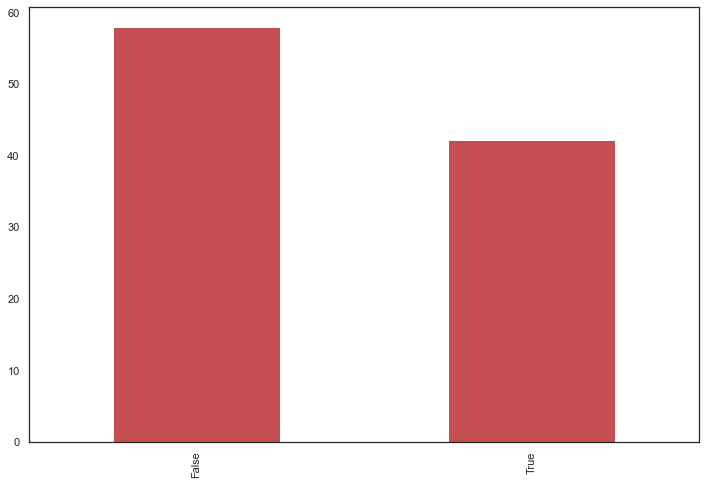

In [ ]:
plt.figure(figsize=(12,8))
(df['count'].value_counts()/len(df)*100).plot(kind='bar',color='r')

> **As we can see that about half(42.10 %) values between two columns document_create_date and  document_create_date.1 are same
so we can drop document_create_date and keep document_create_date.1 as it is normalised form.**

In [ ]:
df.drop(['document_create_date','Day','Day.1','count'],axis=1,inplace=True)

In [ ]:
# Converting total_open_amount datatype to float from object type as it wil be easier for numerical operation.
df["total_open_amount"] = df["total_open_amount"].astype(str).astype(float)

# Converting isOpen datatype to int from object type as it wil be easier for numerical operation.
df["isOpen"] = df["isOpen"].astype(str).astype(int)

# Converting delay datatype to int from object type as it wil be easier for numerical operation.
df["delay"] = df["delay"].astype(str).astype(int)

In [ ]:
#columns are deleted
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200705742,DOT foundation,2019-03-25,2019.0,1928921980.0,2019-03-08,2019-03-08,2019-03-28,USD,RV,1.0,66859.77,2019-03-08,NAD1,0,-3
1,U001,200434439,BAUGH SU systems,2019-07-11,2019.0,1929544995.0,2019-06-26,2019-06-26,2019-07-11,USD,RV,1.0,36196.38,2019-06-26,NAA8,0,0
2,U001,200974851,RESTA associates,2019-04-25,2019.0,1929125300.0,2019-04-10,2019-04-10,2019-04-25,USD,RV,1.0,6884.49,2019-04-10,NAA8,0,0
3,U001,0200769623,WAL-MAR in,2019-01-15,2019.0,1928566666.0,2019-01-04,2019-01-04,2019-01-19,USD,RV,1.0,21367.34,2019-01-04,NAH4,0,-4
4,U001,0200726979,BJ'S in,2019-02-07,2019.0,1928657020.0,2019-01-23,2019-01-23,2019-02-07,USD,RV,1.0,14997.44,2019-01-23,NAA8,0,0


In [ ]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int32
delay                              int32
dtype: object

# Splitting the data into Train Set,Validation Set,Test Set

>+ **We have to divide our dataset on basis of date so for that it's very important to know that from which date our data is starting and on which date it is finishing.**  

> + **Any valid invoice will have (document_create_date.1 less < due_in_date).Any invoice not following this condition will be an anomaly or abnormal data.** 

In [ ]:
#Applying the condition
df[df['document_create_date.1']<df['due_in_date']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200705742,DOT foundation,2019-03-25,2019.0,1928921980.0,2019-03-08,2019-03-08,2019-03-28,USD,RV,1.0,66859.77,2019-03-08,NAD1,0,-3
1,U001,200434439,BAUGH SU systems,2019-07-11,2019.0,1929544995.0,2019-06-26,2019-06-26,2019-07-11,USD,RV,1.0,36196.38,2019-06-26,NAA8,0,0
2,U001,200974851,RESTA associates,2019-04-25,2019.0,1929125300.0,2019-04-10,2019-04-10,2019-04-25,USD,RV,1.0,6884.49,2019-04-10,NAA8,0,0
3,U001,0200769623,WAL-MAR in,2019-01-15,2019.0,1928566666.0,2019-01-04,2019-01-04,2019-01-19,USD,RV,1.0,21367.34,2019-01-04,NAH4,0,-4
4,U001,0200726979,BJ'S in,2019-02-07,2019.0,1928657020.0,2019-01-23,2019-01-23,2019-02-07,USD,RV,1.0,14997.44,2019-01-23,NAA8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45551,U001,200820380,SMITH'S corp,2019-07-23,2019.0,1929586298.0,2019-07-07,2019-07-07,2019-07-22,USD,RV,1.0,64233.60,2019-07-07,NAA8,0,1
45552,U001,0200736337,SYSCO F us,2019-05-06,2019.0,1929146754.0,2019-04-17,2019-04-17,2019-05-02,USD,RV,1.0,5516.74,2019-04-17,NAA8,0,4
45553,U001,0200707005,KING S llc,2019-05-28,2019.0,1929289052.0,2019-05-11,2019-05-11,2019-05-26,USD,RV,1.0,17064.00,2019-05-11,NAA8,0,2
45554,U001,0200714710,SYSCO us,2019-11-12,2019.0,1929983349.0,2019-10-08,2019-10-08,2019-11-09,USD,RV,1.0,7293.01,2019-10-08,NA32,0,3


In [ ]:
df=df[df['document_create_date.1']<df['due_in_date']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44664 entries, 0 to 45555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           44664 non-null  object        
 1   cust_number             44664 non-null  object        
 2   name_customer           44664 non-null  object        
 3   clear_date              44664 non-null  datetime64[ns]
 4   buisness_year           44664 non-null  object        
 5   doc_id                  44664 non-null  object        
 6   posting_date            44664 non-null  datetime64[ns]
 7   document_create_date.1  44664 non-null  datetime64[ns]
 8   due_in_date             44664 non-null  datetime64[ns]
 9   invoice_currency        44664 non-null  object        
 10  document type           44664 non-null  object        
 11  posting_id              44664 non-null  object        
 12  total_open_amount       44664 non-null  float6

In [ ]:
df.sort_values(by=['document_create_date.1'],inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30703,U001,0200759878,SA corporation,2020-03-13,2020.0,1930560319.0,2020-02-26,2020-02-26,2020-03-12,USD,RV,1.0,14422.83,2020-02-26,NAH4,0,1
19450,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2960617072.0,2020-02-27,2020-02-27,2020-03-09,CAD,RV,1.0,16811.94,2020-02-28,CA10,0,9
18796,U001,0200763152,PERFOR corporation,2020-03-16,2020.0,1930571263.0,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,33765.66,2020-02-27,NAA8,0,3
41437,CA02,0140105686,SYSC foundation,2020-03-12,2020.0,2960617065.0,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,24800.80,2020-02-29,CA10,0,2


In [ ]:
# Our data is starting from 2018-10-24 
df[df['document_create_date.1']==df['document_create_date.1'].min()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.4,2018-10-24,CA10,0,209


In [ ]:
# Our data has finished on 2020-02-27
df[df['document_create_date.1']==df['document_create_date.1'].max()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
19450,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2960617072.0,2020-02-27,2020-02-27,2020-03-09,CAD,RV,1.0,16811.94,2020-02-28,CA10,0,9
18796,U001,0200763152,PERFOR corporation,2020-03-16,2020.0,1930571263.0,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,33765.66,2020-02-27,NAA8,0,3
41437,CA02,0140105686,SYSC foundation,2020-03-12,2020.0,2960617065.0,2020-02-27,2020-02-27,2020-03-10,CAD,RV,1.0,24800.80,2020-02-29,CA10,0,2
3675,U001,0200794332,COST llc,2020-03-12,2020.0,1930572337.0,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,8793.09,2020-02-27,NAAX,0,-1


> + **So now we will divide our data into train set,validation set,test set in 70:15:15.**

>+ **First we will divide our data into Train and temp set into 70:30 and then temp set into validation and test as 15:15 set.**

> + **Train set is from <ins>2018-10-24 to 2019-10-08</ins>** 

> + **validation set is from <ins>2019-10-08 to 2019-12-10</ins>** 

> + **Train set is from <ins>2019-12-10 to 2020-02-27</ins>.** 


In [ ]:
# Splitting the initial dataframe into train and temp
train=df[df['document_create_date.1'] <= '2019-10-08'].copy()
temp=df[df['document_create_date.1'] > '2019-10-08'].copy()

In [ ]:
# Spliting the temp into validation and test set
val=temp[temp['document_create_date.1'] <= '2019-12-10'].copy()
test=temp[temp['document_create_date.1'] > '2019-12-10'].copy()

## Checking the splitting percentage

In [ ]:
print("percentage of train set :",round((len(train)/len(df))*100))
print("percentage of validation set :",round((len(val)/len(df))*100))
print("percentage of test set :",round((len(test)/len(df))*100))

percentage of train set : 70
percentage of validation set : 15
percentage of test set : 15


## Checking the shape of all the sets 

In [ ]:
# Below is the shape of all the set we have prepared

print("Train data shape :",train.shape)
print("Validation data shape :",val.shape)
print("Test data shape :",test.shape)

Train data shape : (31336, 17)
Validation data shape : (6614, 17)
Test data shape : (6714, 17)


# Exploratory Data Analysis

>  **Now we have split our dataset into train,val and test set so it's time for Doing some EDA on Train set**

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1


# Categorical Columns

In [ ]:
#Getting categorical columns
categorical_col=[]
for i in train.columns:
    print(f"no of unique value in column {i:{25}}--------->{train[i].nunique()}")
    cnt=train[i].nunique()
    if(cnt>1 and cnt<=8):
        categorical_col.append(i)

no of unique value in column business_code            --------->6
no of unique value in column cust_number              --------->1242
no of unique value in column name_customer            --------->3536
no of unique value in column clear_date               --------->287
no of unique value in column buisness_year            --------->1
no of unique value in column doc_id                   --------->31336
no of unique value in column posting_date             --------->283
no of unique value in column document_create_date.1   --------->284
no of unique value in column due_in_date              --------->337
no of unique value in column invoice_currency         --------->2
no of unique value in column document type            --------->2
no of unique value in column posting_id               --------->1
no of unique value in column total_open_amount        --------->28529
no of unique value in column baseline_create_date     --------->292
no of unique value in column cust_payment_terms     

In [ ]:
# Unique values in categorical columns
for col in categorical_col:
    print(col)
    print("-------------")
    print("")
    print("Unique values :",train[col].nunique())
    print(train[col].value_counts())
    print()

business_code
-------------

Unique values : 6
U001    28249
CA02     2526
U013      438
U002      112
U005       10
U007        1
Name: business_code, dtype: int64

invoice_currency
-------------

Unique values : 2
USD    28810
CAD     2526
Name: invoice_currency, dtype: int64

document type
-------------

Unique values : 2
RV    31332
X2        4
Name: document type, dtype: int64



In [ ]:
# Object Datatype Columns
object_columns=list(train.columns[train.dtypes=='object'])
object_columns

['business_code',
 'cust_number',
 'name_customer',
 'buisness_year',
 'doc_id',
 'invoice_currency',
 'document type',
 'posting_id',
 'cust_payment_terms']

In [ ]:
train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int32
delay                              int32
dtype: object

In [ ]:
# Describe function on object columns and different functions on them  
train[object_columns].describe().transpose()

,count,unique,top,freq
business_code,31336,6,U001,28249
cust_number,31336,1242,0200769623,6795
name_customer,31336,3536,WAL-MAR co,728
buisness_year,31336.0,1.0,2019.0,31336.0
doc_id,31336.0,31336.0,1929576451.0,1.0
invoice_currency,31336,2,USD,28810
document type,31336,2,RV,31332
posting_id,31336.0,1.0,1.0,31336.0
cust_payment_terms,31336,64,NAA8,12845


In [ ]:
# Describe function on categorical columns and different functions on them  
train[categorical_col].describe().transpose()

,count,unique,top,freq
business_code,31336,6,U001,28249
invoice_currency,31336,2,USD,28810
document type,31336,2,RV,31332


In [ ]:
# We can see that no businees is done in year 2020 as dataframe is empty for 2020
df[df['buisness_year']=='2020']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay


In [ ]:
# We can see that customer paying in US dollar have more delays than customers paying in CAD (canadian dollar).  
train.groupby('invoice_currency').count()['delay']

invoice_currency
CAD     2526
USD    28810
Name: delay, dtype: int64

<AxesSubplot:xlabel='invoice_currency'>

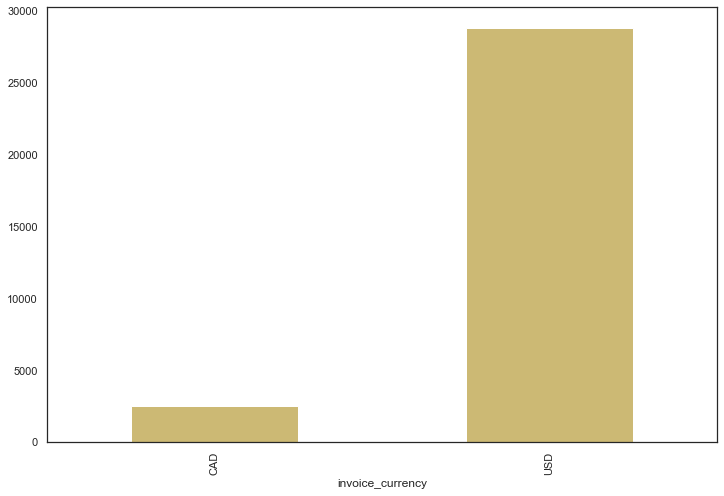

In [ ]:
# also we can see by bar plots
plt.figure(figsize=(12,8))
train.groupby('invoice_currency').count()['delay'].plot(kind='bar',color='y')

<AxesSubplot:xlabel='invoice_currency', ylabel='total_open_amount'>

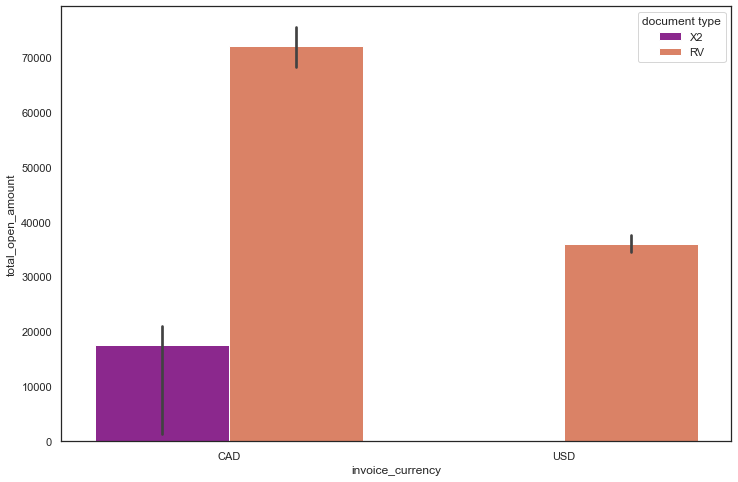

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x ='invoice_currency', y ='total_open_amount', data = train,  
            palette ='plasma',hue='document type', estimator = np.std)

> **we can see that the total_open_amount in canadian dollars is more than the total open amounts in USD.**

<AxesSubplot:xlabel='business_code', ylabel='total_open_amount'>

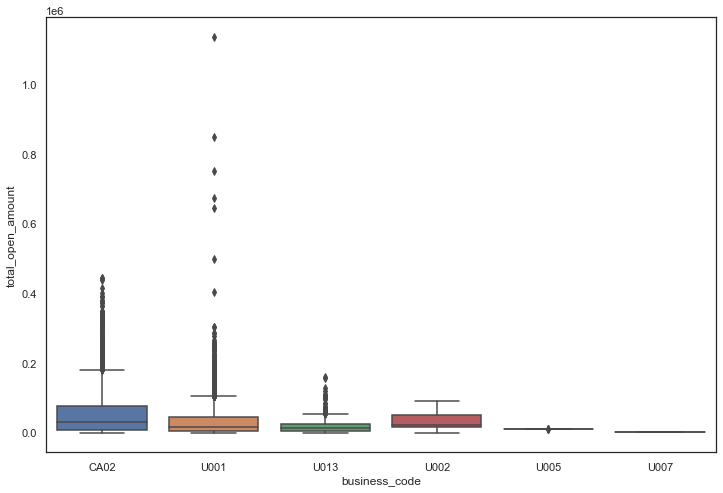

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='business_code', y ='total_open_amount', data =train) 

<AxesSubplot:xlabel='business_code', ylabel='total_open_amount'>

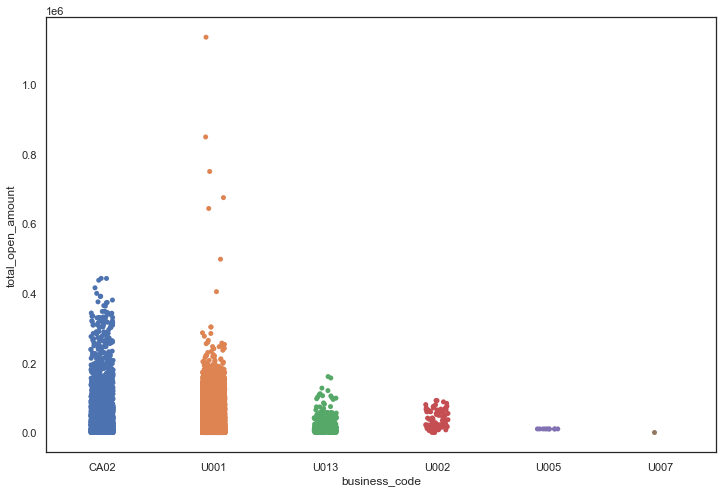

In [ ]:
plt.figure(figsize=(12,8))
sns.stripplot(x ='business_code', y ='total_open_amount', data =train)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

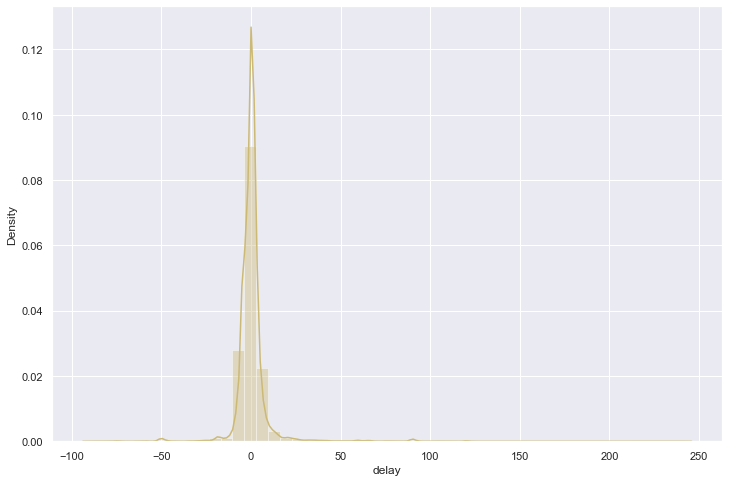

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_color_codes()
sns.distplot(train['delay'],color='y')

> **Above plot shows us delay days and the density i.e no of delays days which are most in the data.**

<AxesSubplot:xlabel='business_code'>

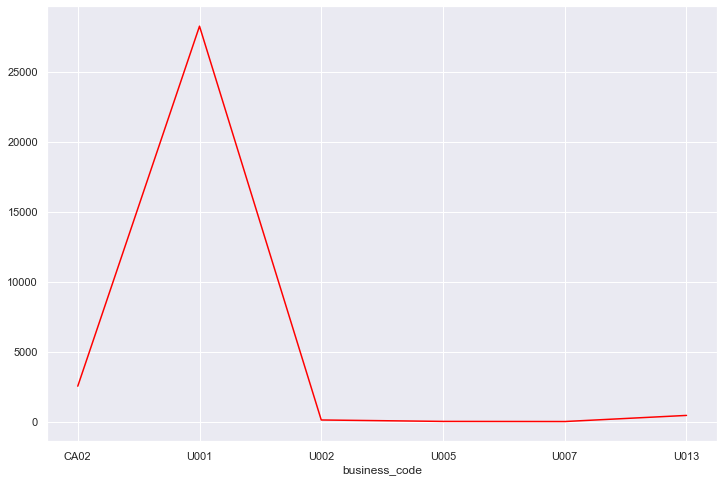

In [ ]:

plt.figure(figsize=(12,8))
train.groupby('business_code').count()['delay'].plot(color='red')

> **Business Code U001 have highest delay among all the business codes.**  

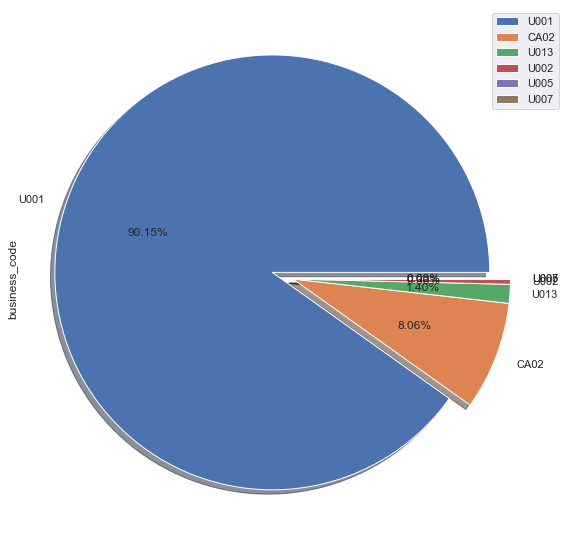

In [ ]:
plt.figure(figsize=(12,8))
train['business_code'].value_counts().plot(kind='pie',explode=[0.1,0,0,0,0,0],shadow = True,autopct='%1.2f%%',figsize=(15, 10),
                                           labels=["U001","CA02","U013","U002","U005","U007"])
plt.legend(["U001","CA02","U013","U002","U005","U007"])
plt.show()

> **Business_code U001 is abundant among all the values of business_codes.** 

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

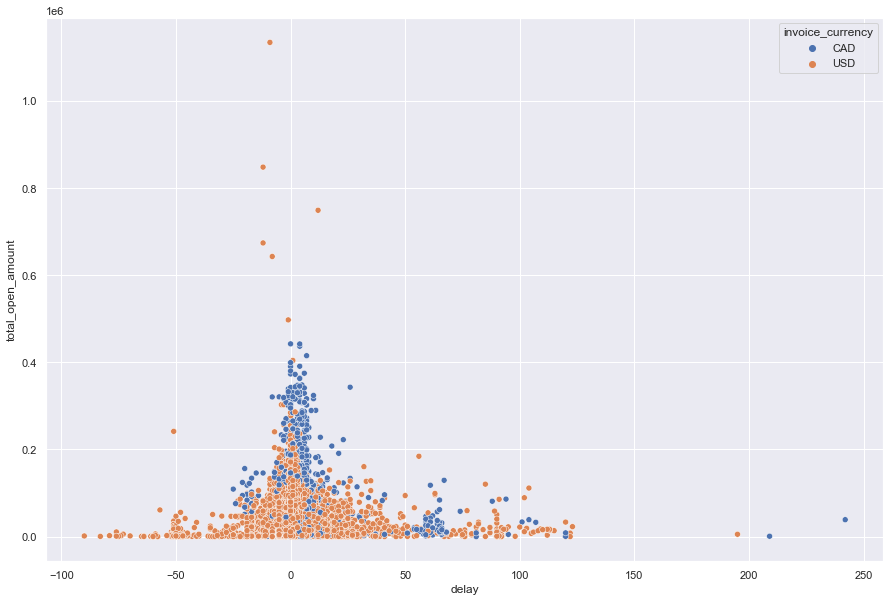

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot('delay','total_open_amount',data=train,hue='invoice_currency',palette='deep')

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1


<AxesSubplot:xlabel='business_code', ylabel='count'>

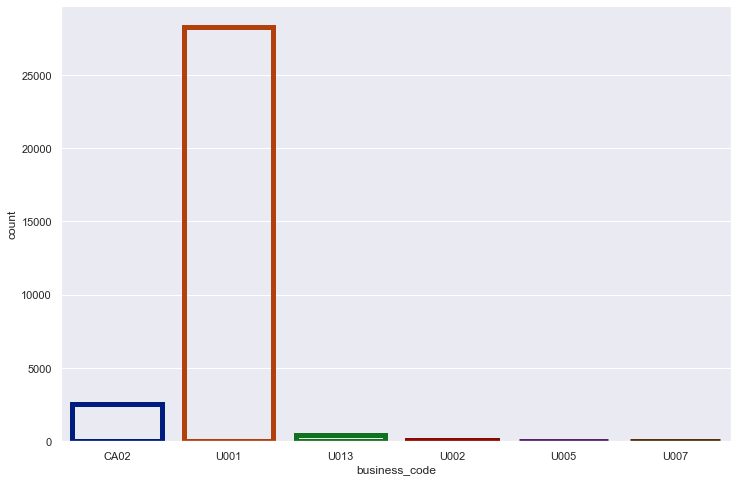

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="business_code", data=train,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 6))

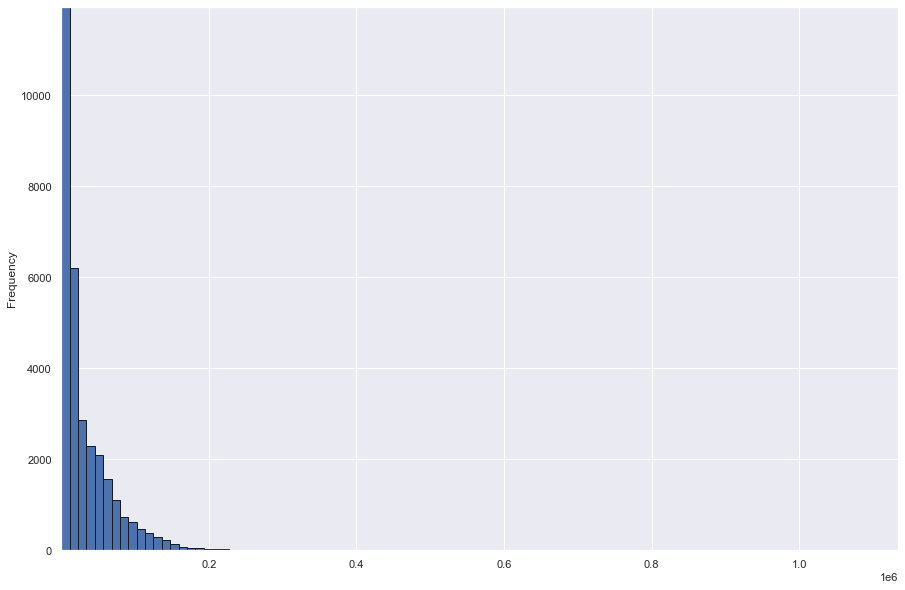

In [ ]:
plt.figure(figsize=(15,10))
train['total_open_amount'].plot.hist(bins=100,edgecolor='k',grid=True).autoscale(enable=True,axis='both',tight=True)

In [ ]:
train_1=train.copy()
train_1.set_index('clear_date',inplace=True)

[Text(0.5, 0, 'clear_date'), Text(0, 0.5, 'delay')]

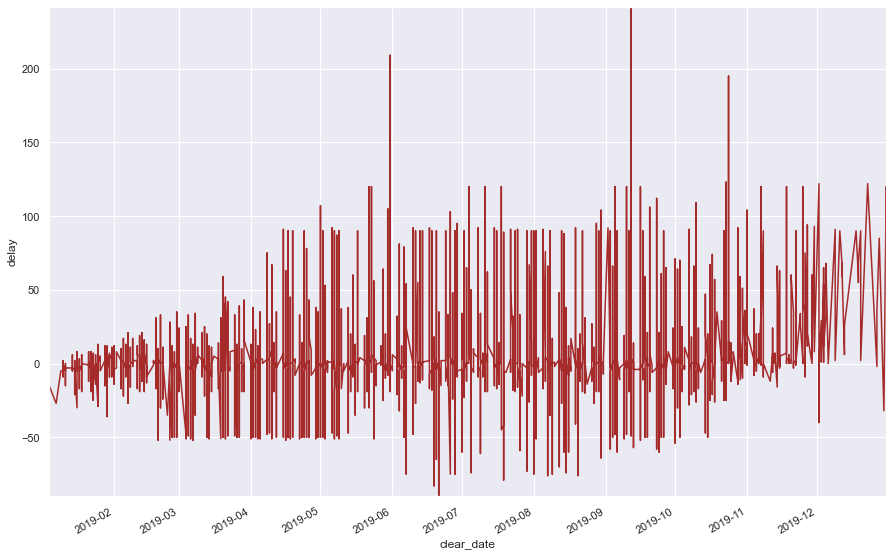

In [ ]:
ax=train_1['delay'].plot(figsize=(15,10),color='brown')
ax.autoscale(axis='both',tight=True)
ax.set(xlabel='clear_date',ylabel='delay')

> **As we can see that as the clearing_date increase the delay time also increses.Months like july,August,september delay time is high.**

# Looking into Delay Column

In [ ]:
# Minimum delay is -9 means that the buyer has cleared his invoice 9 days before the due date.
train['delay'].min()

-90

In [ ]:
# Maximum day is 95 means some buyer has cleared his invoice after 98 days of due_date.
train['delay'].max()

242

In [ ]:
# There are 6777 buyers who have clear this invoices on time.
train[train['delay']==0].count()

business_code             6746
cust_number               6746
name_customer             6746
clear_date                6746
buisness_year             6746
doc_id                    6746
posting_date              6746
document_create_date.1    6746
due_in_date               6746
invoice_currency          6746
document type             6746
posting_id                6746
total_open_amount         6746
baseline_create_date      6746
cust_payment_terms        6746
isOpen                    6746
delay                     6746
dtype: int64

# Visualizing Delay column

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

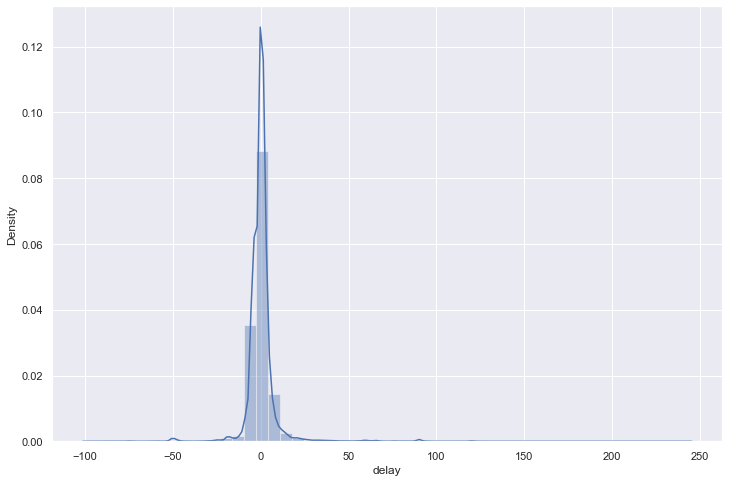

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['delay'])

In [ ]:
# Making a function to categorise them into categories
def delay_viz(x):
    if(x<0):
        return 'before_due_date'
    elif(x==0):
        return 'On_due_date'
    else:
        return 'after_due_date'

In [ ]:
#Applying the function on train set
train['delay_cat']=train['delay'].apply(delay_viz)

In [ ]:
# We can see that out of 31762 train data approx 42 % clears their invoices after the due_date,37 % before due_date and 21 % on the due_date

train['delay_cat'].value_counts()/len(train)*100

after_due_date     41.741128
before_due_date    36.730917
On_due_date        21.527955
Name: delay_cat, dtype: float64

<AxesSubplot:>

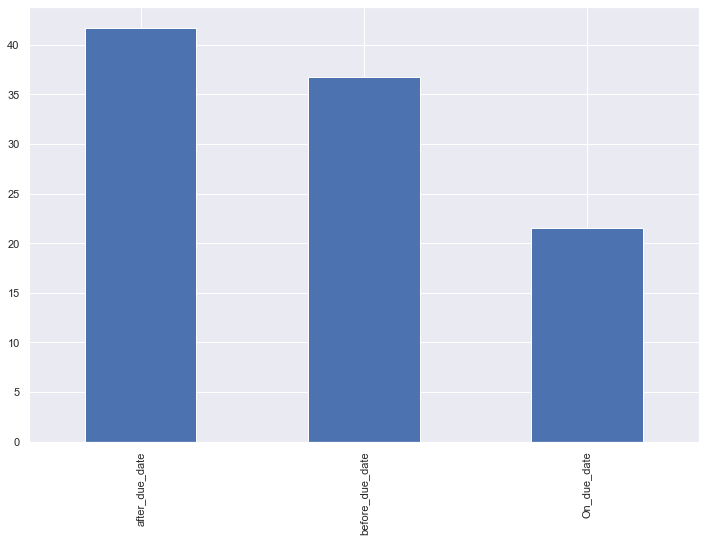

In [ ]:
# Visualizing the delay column 
plt.figure(figsize=(12,8))
((train['delay_cat'].value_counts()/len(train))*100).plot(kind='bar')

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,delay_cat
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209,after_due_date
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4,before_due_date
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0,On_due_date
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4,before_due_date
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1,after_due_date


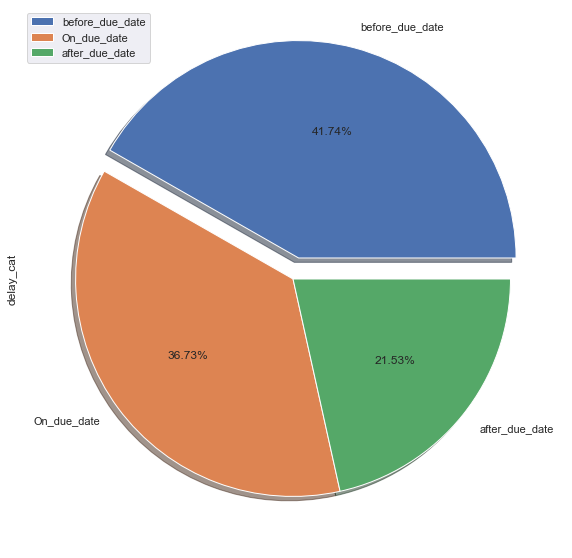

In [ ]:
plt.figure(figsize=(12,8))
train['delay_cat'].value_counts().plot(kind='pie',explode=[0.1,0,0],shadow = True,autopct='%1.2f%%',figsize=(15, 10),
                                           labels=["before_due_date","On_due_date","after_due_date"])
plt.legend(["before_due_date","On_due_date","after_due_date"],loc="upper left")
plt.show()

In [ ]:
# We have made delay_cat col just to visualize and analyze we can,t keep as a features so we have to drop them.
train.drop('delay_cat',axis=1,inplace=True)

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1


# Skewness


Skewness for data :  4.793890658522154


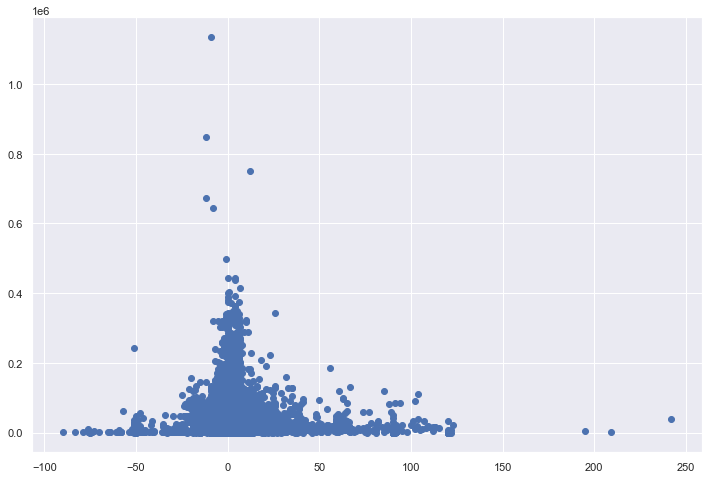

In [ ]:
from scipy.stats import skew
import numpy as np  
import pylab as p  
  
x1 = train['delay'] 
y1 = train['total_open_amount']
plt.figure(figsize=(12,8))
p.plot(x1,y1,'bo') 
  
print( '\nSkewness for data : ', skew(x1))
      
      


> **We can see our data is highly positively skewed as its value is greater than 1 and also we can see by visualization as its tail is towards right.**

# Multivariate Analysis:<ins>Correlation and Covariance</ins> 

In [ ]:
#correlation between all the numerical data.
train.corr()['delay']

total_open_amount    0.030662
isOpen                    NaN
delay                1.000000
Name: delay, dtype: float64

<AxesSubplot:>

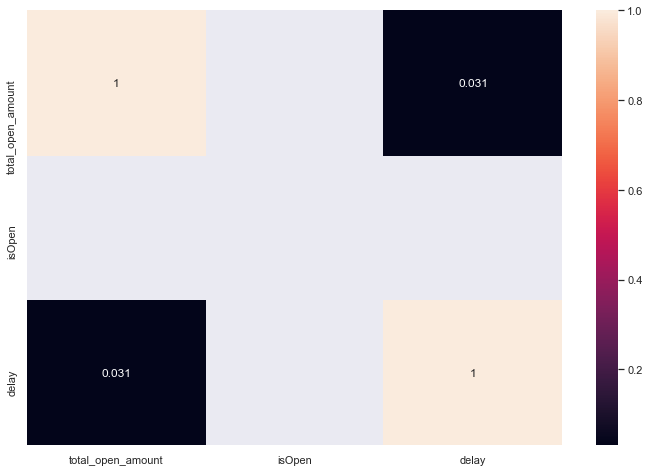

In [ ]:
#Heat Map showing the correlation between the data. 
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)

In [ ]:
# Covariance between all the numerical data of train data 
train.cov()

,total_open_amount,isOpen,delay
total_open_amount,1.662305e+09,0.0,12669.160889
isOpen,0.000000e+00,0.0,0.000000
delay,1.266916e+04,0.0,102.702198


# Outlier Detection

In [ ]:
# We can detect outlier only in numerical column so make another dataframe
train_2=df[['total_open_amount','delay']]
train_2.loc[45442]

total_open_amount    16949.82
delay                   93.00
Name: 45442, dtype: float64

# Z-Score Method for Outlier Detection

> + **You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.**

In [ ]:
# Applying z-score method
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_2))
print(z)

[[ 0.7655751  21.97864628]
 [ 0.2058699   0.45430259]
 [ 1.29330195  0.03302655]
 ...
 [ 0.03008462  0.28293047]
 [ 0.18680721  0.17761146]
 [ 0.57409062  0.13834556]]


In [ ]:
#we will take threshold value to be 3
threshold = 3
c=np.where(z > threshold)

In [ ]:
# It's a tuple of arrays.
# The first array contains the list of row numbers and second array respective column numbers in which outliers are present 
c

(array([    0,    64,    71, ..., 44591, 44618, 44622], dtype=int64),
 array([1, 1, 0, ..., 1, 0, 1], dtype=int64))

In [ ]:
# So we have 1704 outliers in our data.
print("we have",c[1].shape[0], "outliers in our train data")

we have 1392 outliers in our train data


In [ ]:
train['document type'].value_counts()

RV    31332
X2        4
Name: document type, dtype: int64

# Feature Engineering

# Binning

> + **We can see that total_open_amount i.e the amount which is to be paid can have different values. So let's check the Values of total_open_amount.**

> + **From now on anything we perform on train data must be perform also on val,test and final_test data.**

In [ ]:
# Maximum amount to be paid . 
train['total_open_amount'].max()

1134400.14

In [ ]:
#Minimum amount to be paid.
train['total_open_amount'].min()

3.42

In [ ]:
# Dataframe containing the Minimum total_open_amount
train[train['total_open_amount']==train['total_open_amount'].min()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
45281,CA02,0140106302,GR JEA llc,2019-06-04,2019.0,2960532531.0,2019-03-05,2019-03-05,2019-03-15,CAD,RV,1.0,3.42,2019-03-05,CAX2,0,81


In [ ]:
# Dataframe containing the Maximum total_open_amount
train[train['total_open_amount']==train['total_open_amount'].max()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
2594,U001,0100058056,SIMPLO,2019-03-07,2019.0,1928885879.0,2019-03-01,2019-03-01,2019-03-16,USD,RV,1.0,1134400.14,2019-03-01,NAA8,0,-9


> + **We Made a bin  <br> . (0 to 10000]----> Bin 0 <br>. (10000, 100000]---->Bin 1 <br> .(100000 to 500000]----> Bin 2 <br>. (500000, 1200000]---->Bin3 <br>**

In [ ]:
bin_ranges=[0,10000,100000,500000,1200000]
bin_names=[0,1,2,3]
train['amount_category'] = pd.cut( np.array(train['total_open_amount']),bins=bin_ranges,labels=bin_names)


In [ ]:
# On val set
bin_ranges=[0,10000,100000,500000,1200000]
bin_names=[0,1,2,3]
val['amount_category'] = pd.cut( np.array(val['total_open_amount']),bins=bin_ranges,labels=bin_names)

In [ ]:
# On test set
bin_ranges=[0,10000,100000,500000,1200000]
bin_names=[0,1,2,3]
test['amount_category'] = pd.cut( np.array(test['total_open_amount']),bins=bin_ranges,labels=bin_names)

In [ ]:
# On test set
bin_ranges=[0,10000,100000,500000,1200000]
bin_names=[0,1,2,3]
final_test['amount_category'] = pd.cut( np.array(final_test['total_open_amount']),bins=bin_ranges,labels=bin_names)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209,0
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4,1
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0,1
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4,1
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,U001,0200762301,C&S WH corporation,2019-10-23,2019.0,1929988956.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,10960.29,2019-10-08,NAC6,0,0,1
11028,U001,0200769623,WAL-MAR llc,2019-10-18,2019.0,1929981880.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,47957.39,2019-10-08,NAH4,0,-5,1
12399,U001,0200769623,WAL-MAR foundation,2019-10-18,2019.0,1929982470.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,4375.84,2019-10-08,NAH4,0,-5,0
27841,U013,0140103480,PRIC systems,2019-11-25,2019.0,1991831530.0,2019-10-08,2019-10-08,2019-11-22,USD,RV,1.0,20782.80,2019-10-08,NAVF,0,3,1


In [ ]:

(train['amount_category'].value_counts().sort_values(ascending=False))/len(train)*100

1    57.674879
0    35.898009
2     6.411156
3     0.015956
Name: amount_category, dtype: float64

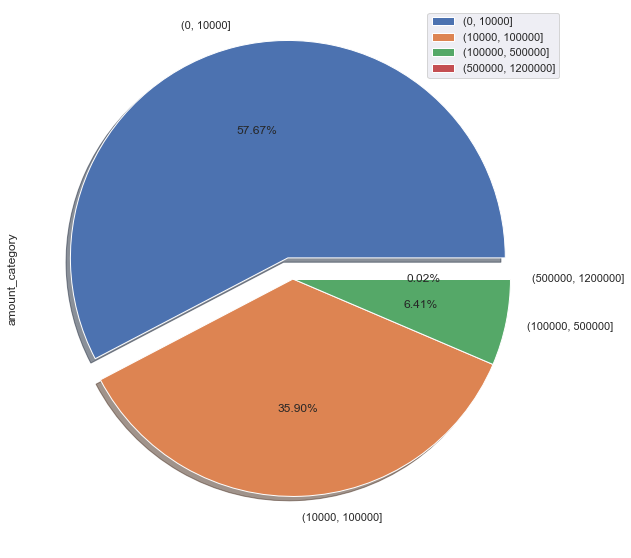

In [ ]:
plt.figure(figsize=(12,8))
((train['amount_category'].value_counts().sort_values(ascending=False))/len(train)*100).plot(kind='pie',explode=[0.1,0,0,0],shadow = True,autopct='%1.2f%%',figsize=(15, 10),
                                          labels=["(0, 10000]","(10000, 100000]","(100000, 500000]","(500000, 1200000]"] )
plt.legend(labels=["(0, 10000]","(10000, 100000]","(100000, 500000]","(500000, 1200000]"])

> + **We can see that the most of the open amount are in between in the range of(0,10000] then (10000,100000] then (100000,500000] and least of above 500000.**

# Extracting Numeric and string variable from Business_code

In [ ]:
# Checking the counts
train['business_code'].value_counts()

U001    28249
CA02     2526
U013      438
U002      112
U005       10
U007        1
Name: business_code, dtype: int64

In [ ]:
# Extracting Number from business_code
train['business_code_numeric']=train.business_code.str.extract('(\d+)')
train['business_code_numeric']=train['business_code_numeric'].astype(str).astype(int)

In [ ]:
# Extracting Number from business_code on val set
val['business_code_numeric']=val.business_code.str.extract('(\d+)')
val['business_code_numeric']=val['business_code_numeric'].astype(str).astype(int)

In [ ]:
# Extracting Number from business_code on test set
test['business_code_numeric']=test.business_code.str.extract('(\d+)')
test['business_code_numeric']=test['business_code_numeric'].astype(str).astype(int)

In [ ]:
# Extracting Number from business_code on test set
final_test['business_code_numeric']=final_test.business_code.str.extract('(\d+)')
final_test['business_code_numeric']=final_test['business_code_numeric'].astype(str).astype(int)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#checking head
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209,0,2
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4,1,1
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0,1,1
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4,1,1
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1,1,1


In [ ]:
#Checking value_counts of business_code_numeric
train['business_code_numeric'].value_counts()

1     28249
2      2638
13      438
5        10
7         1
Name: business_code_numeric, dtype: int64

In [ ]:
# Extracting string values from business_code
train['business_code_label']=train['business_code'].replace('[0-9]'," ",regex=True)

In [ ]:
# Extracting string values from business_code on val set
val['business_code_label']=val['business_code'].replace('[0-9]'," ",regex=True)

In [ ]:
# Extracting string values from business_code on test set
test['business_code_label']=test['business_code'].replace('[0-9]'," ",regex=True)

In [ ]:
# Extracting string values from business_code on test set
final_test['business_code_label']=final_test['business_code'].replace('[0-9]'," ",regex=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric,business_code_label
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,CA10,0,209,0,2,CA
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,NAH4,0,-4,1,1,U
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,NAA8,0,0,1,1,U
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,NAH4,0,-4,1,1,U
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,NAH4,0,1,1,1,U


In [ ]:
#Checking value_counts of business_code_label
train['business_code_label'].value_counts()

U       28810
CA       2526
Name: business_code_label, dtype: int64

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='business_code_numeric', ylabel='count'>

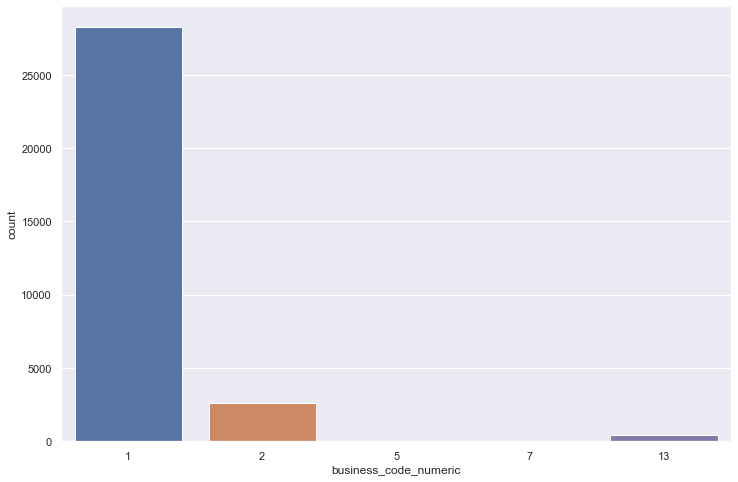

In [ ]:
# Visualizing the business_code_numeric column
plt.figure(figsize=(12,8))
sns.countplot(train['business_code_numeric'],data=train)

> + **business_code_numeric 001 has highest no of counts.**

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='business_code_label', ylabel='count'>

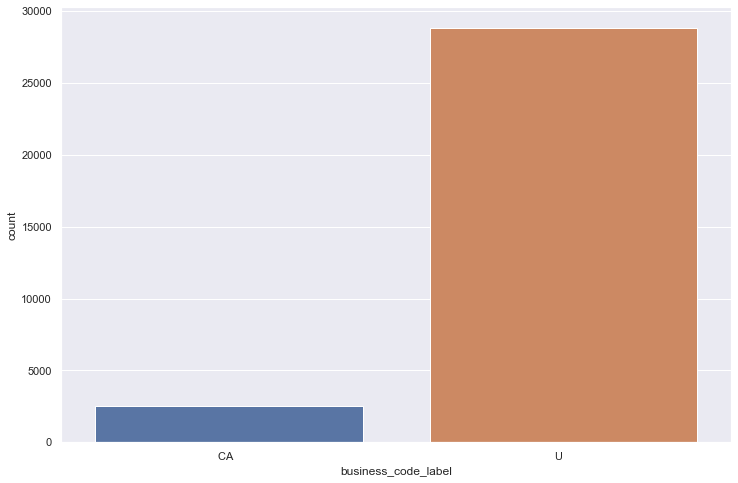

In [ ]:
# Visualizing the business_code_label column
plt.figure(figsize=(12,8))
sns.countplot(train['business_code_label'],data=train)

> + **business_code_label "U" has highest no of counts.**

In [ ]:
# cust_payment terms contains large no of unique values 
(train['cust_payment_terms'].value_counts().head(60))/len(train)*100

NAA8    40.991192
NAH4    26.477534
CA10     7.783380
NAC6     3.590120
NAM4     2.664667
NAAX     2.434899
NAD1     2.071100
NAG2     1.930687
NAU5     1.857289
NAGD     1.783891
NA32     1.515828
NAM2     0.903115
NA10     0.845673
NAD5     0.756319
NAVE     0.609523
NAVF     0.593567
NAAW     0.465918
NAWN     0.351034
NAM1     0.338269
NAVR     0.296783
NAVQ     0.277636
NAWU     0.229768
NAUZ     0.149987
CA30     0.134031
NAWP     0.105310
NAVM     0.098928
NA3B     0.095737
NABG     0.076589
NACB     0.076589
NA38     0.057442
NA3F     0.047868
NAX2     0.041486
NA9X     0.035103
NAVL     0.035103
NAD4     0.025530
C106     0.022339
NA84     0.022339
NAVD     0.022339
BR56     0.015956
NAD8     0.015956
NA25     0.012765
NANC     0.012765
B052     0.012765
NA8Q     0.012765
NAWM     0.009574
NATL     0.009574
CAX2     0.009574
BR12     0.006382
NATK     0.006382
NAUI     0.006382
NAV9     0.006382
C129     0.006382
NATJ     0.006382
NATV     0.003191
CA60     0.003191
B112     0

> + **cust_payment_terms contains large no of unique values as we can see above cust_payment_terms <ins>"NAA8"</ins> has most of the values then <ins>*NAH4*</ins> then <ins>*CA10*</ins> and then very small cust_payment_terms.**

> + **Now we make a function to encode them:<br> . NAA8---->0<br> .NAH4---->1<BR> .CA10---->2<BR> .NAC6---->3<BR> .OTHERS---->4**


In [ ]:
# function to encode
def cust_encode(x):
    if(x=='NAA8'):
        return 0
    elif(x=='NAH4'):
        return 1
    elif(x=='CA10'):
        return 2
    elif(x=='NAC6'):
        return 3
    else:
        return 4

In [ ]:
train['cust_payment_terms']=train['cust_payment_terms'].apply(cust_encode)

In [ ]:
#on val set
val['cust_payment_terms']=val['cust_payment_terms'].apply(cust_encode)

In [ ]:
#on test set
test['cust_payment_terms']=test['cust_payment_terms'].apply(cust_encode)

In [ ]:
#on test set
final_test['cust_payment_terms']=final_test['cust_payment_terms'].apply(cust_encode)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric,business_code_label
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,2,0,209,0,2,CA
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,1,0,-4,1,1,U
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,0,0,0,1,1,U
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,1,0,-4,1,1,U
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,1,0,1,1,1,U


In [ ]:
train['cust_payment_terms'].value_counts()

0    12845
1     8297
4     6630
2     2439
3     1125
Name: cust_payment_terms, dtype: int64

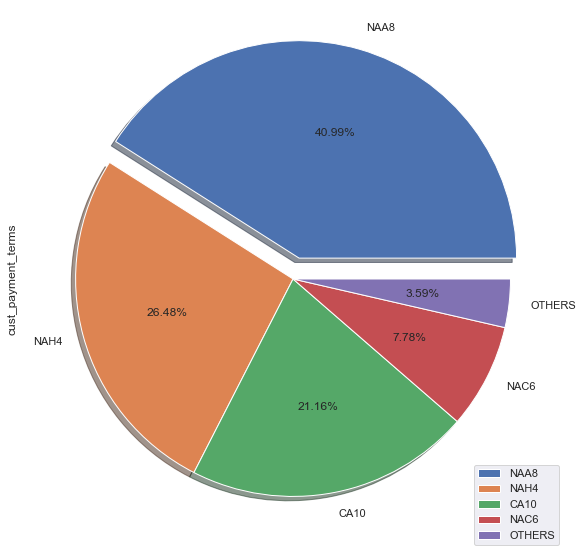

In [ ]:
plt.figure(figsize=(12,8))
((train['cust_payment_terms'].value_counts().sort_values(ascending=False))/len(train)*100).plot(kind='pie',explode=[0.1,0,0,0,0],shadow = True,autopct='%1.2f%%',figsize=(15, 10),
                                          labels=['NAA8','NAH4','CA10','NAC6','OTHERS'])
plt.legend(labels=['NAA8','NAH4','CA10','NAC6','OTHERS'])

> + **Above we can see the visualization of all types of Cust_payment_terms.**

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric,business_code_label
17648,CA02,0140104409,LOB co,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,2,0,209,0,2,CA
19289,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,1,0,-4,1,1,U
23558,U001,0200707822,PUBLI systems,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,0,0,0,1,1,U
38917,U001,0200769623,WAL-MAR foundation,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,1,0,-4,1,1,U
30664,U001,0200759878,SA foundation,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,1,0,1,1,1,U


> + **We can see that name_customer column that is name of the customers are repeating like "WAL-MAR co " and "WAL-MAR associates" and many others are matching ,so what we can do is to convert all these branches into their main branch like "WAL-MAR" .and others to their main branch**

In [ ]:
# checking value_counts
train['name_customer'].value_counts().head(60)

WAL-MAR co             728
WAL-MAR associates     708
WAL-MAR trust          701
WAL-MAR us             698
WAL-MAR foundation     695
WAL-MAR corp           678
WAL-MAR systems        676
WAL-MAR in             669
WAL-MAR llc            665
WAL-MAR                656
WAL-MAR corporation    647
BJ'S  in               132
BJ'S  us               126
BJ'S  llc              125
BJ'S                   125
BJ'S  systems          117
BJ'S  associates       111
SA llc                 110
SA corp                110
BJ'S  trust            109
BJ'S  corp             108
C&S WH systems         106
C&S WH                 105
BJ'S  co               105
C&S WH us              103
SA systems             101
SA associates          100
C&S WH corporation     100
C&S WH foundation       98
C&S WH trust            97
BJ'S  corporation       97
SA corporation          97
BJ'S  foundation        97
SA foundation           97
C&S WH co               95
SA co                   95
C&S WH llc              93
C

In [ ]:
# Making the function for classifying the names
def name(x):
    if(x[0:7]=="WAL-MAR"):
        return "WAL-MAR"
    if(x[0:4]=="BJ'S"):
        return "BJ'S"
    if(x[0:2]=="SA"):
        return "SA"
    if(x[0:4]=="COST"):
        return "COST"
    if(x[0:3]=="DEC"):
        return "DEC"
    if(x[0:4]=="TARG"):
        return "TARG"
    if(x[0:6]=="KROGER"):
        return "KROGER"
    else:
        return "Others"

In [ ]:
#Applying the function on column
train['name_customer']=train['name_customer'].apply(name)

In [ ]:
#Applying the function on column on test
test['name_customer']=test['name_customer'].apply(name)

In [ ]:
#Applying the function on column on val set
val['name_customer']=val['name_customer'].apply(name)

In [ ]:
#Applying the function on column on test
final_test['name_customer']=final_test['name_customer'].apply(name)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# checking the counts of each company
train['name_customer'].value_counts()

Others     17635
WAL-MAR     7521
SA          1346
BJ'S        1252
DEC         1221
COST        1057
TARG         691
KROGER       613
Name: name_customer, dtype: int64

In [ ]:
# checking the counts of each company
train['name_customer'].value_counts()/len(train)

Others     0.562771
WAL-MAR    0.240011
SA         0.042954
BJ'S       0.039954
DEC        0.038965
COST       0.033731
TARG       0.022051
KROGER     0.019562
Name: name_customer, dtype: float64

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric,business_code_label
17648,CA02,0140104409,Others,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,2,0,209,0,2,CA
19289,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,1,0,-4,1,1,U
23558,U001,0200707822,Others,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,0,0,0,1,1,U
38917,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,1,0,-4,1,1,U
30664,U001,0200759878,SA,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,1,0,1,1,1,U


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='name_customer', ylabel='count'>

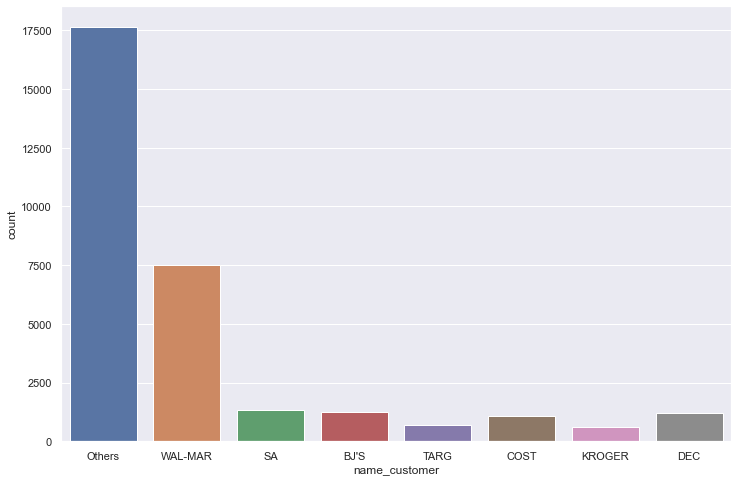

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(train['name_customer'])

> +  **These are the companies and their branches doing the most of the businesses.**

<AxesSubplot:xlabel='name_customer', ylabel='total_open_amount'>

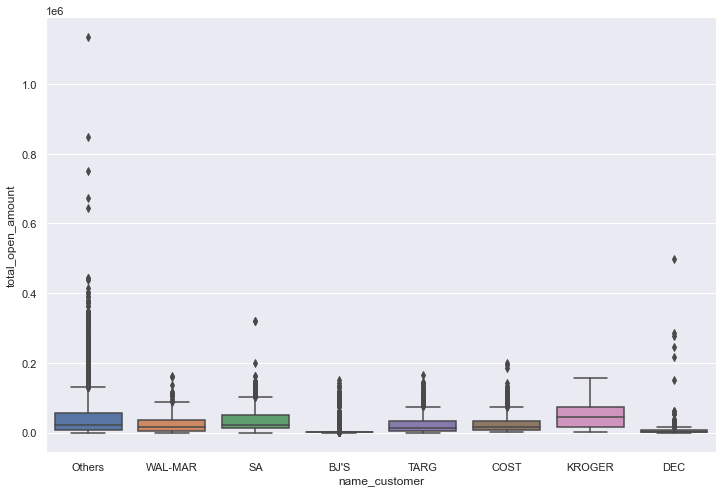

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='name_customer',y='total_open_amount',data=train)

> + **Companies and their total_open_amount to be paid.** 

In [ ]:
train['cust_number'].value_counts()


0200769623    6795
0200726979    1149
0200762301     972
0200759878     774
200769623      726
              ... 
0200078595       1
200759082        1
0100035339       1
0200628215       1
0100034823       1
Name: cust_number, Length: 1242, dtype: int64

In [ ]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,amount_category,business_code_numeric,business_code_label
17648,CA02,0140104409,Others,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,X2,1.0,878.40,2018-10-24,2,0,209,0,2,CA
19289,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,41031.45,2018-12-30,1,0,-4,1,1,U
23558,U001,0200707822,Others,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,85978.63,2018-12-30,0,0,0,1,1,U
38917,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,15583.21,2018-12-30,1,0,-4,1,1,U
30664,U001,0200759878,SA,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,14380.16,2018-12-30,1,0,1,1,1,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,U001,0200762301,Others,2019-10-23,2019.0,1929988956.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,10960.29,2019-10-08,3,0,0,1,1,U
11028,U001,0200769623,WAL-MAR,2019-10-18,2019.0,1929981880.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,47957.39,2019-10-08,1,0,-5,1,1,U
12399,U001,0200769623,WAL-MAR,2019-10-18,2019.0,1929982470.0,2019-10-08,2019-10-08,2019-10-23,USD,RV,1.0,4375.84,2019-10-08,1,0,-5,0,1,U
27841,U013,0140103480,Others,2019-11-25,2019.0,1991831530.0,2019-10-08,2019-10-08,2019-11-22,USD,RV,1.0,20782.80,2019-10-08,4,0,3,1,13,U


# Creating Features from datetime columns

In [ ]:
import datetime as dt
# Extracting posting month from posting date.

train["posting_month"]=train['posting_date'].dt.month
train[['posting_month','posting_date']]

,posting_month,posting_date
17648,3,2019-03-29
19289,12,2018-12-30
23558,12,2018-12-30
38917,12,2018-12-30
30664,12,2018-12-30
...,...,...
8415,10,2019-10-08
11028,10,2019-10-08
12399,10,2019-10-08
27841,10,2019-10-08


In [ ]:
# Extracting posting month from posting date.

val["posting_month"]=val['posting_date'].dt.month

In [ ]:
# Extracting posting month from posting date.

test["posting_month"]=test['posting_date'].dt.month

In [ ]:
# Extracting posting month from posting date.

final_test["posting_month"]=final_test['posting_date'].dt.month

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Extracting posting Year from the posting date
train['posting_year']=train['posting_date'].dt.year

In [ ]:
# Extracting posting Year from the posting date
val['posting_year']=val['posting_date'].dt.year

In [ ]:
# Extracting posting Year from the posting date
test['posting_year']=test['posting_date'].dt.year

In [ ]:
# Extracting posting Year from the posting date
final_test['posting_year']=final_test['posting_date'].dt.year

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train['posting_year'].value_counts()

2019    31199
2018      137
Name: posting_year, dtype: int64

In [ ]:
# Extacting posting quarter for the posting date
train['posting_quarter'] = train['posting_date'].dt.quarter
train[['posting_quarter','posting_month']]

,posting_quarter,posting_month
17648,1,3
19289,4,12
23558,4,12
38917,4,12
30664,4,12
...,...,...
8415,4,10
11028,4,10
12399,4,10
27841,4,10


In [ ]:
val['posting_quarter'] = val['posting_date'].dt.quarter

In [ ]:
test['posting_quarter'] = test['posting_date'].dt.quarter

In [ ]:
final_test['posting_quarter'] = final_test['posting_date'].dt.quarter

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Extracting posting_semester from the posting_quarter column
train['posting_semester'] = np.where(train.posting_quarter.isin([1,2]),1,2)
train[['posting_date','posting_semester']]

,posting_date,posting_semester
17648,2019-03-29,1
19289,2018-12-30,2
23558,2018-12-30,2
38917,2018-12-30,2
30664,2018-12-30,2
...,...,...
8415,2019-10-08,2
11028,2019-10-08,2
12399,2019-10-08,2
27841,2019-10-08,2


In [ ]:
# Extracting posting_semester from the posting_quarter column
val['posting_semester'] = np.where(val.posting_quarter.isin([1,2]),1,2)

In [ ]:
# Extracting posting_semester from the posting_quarter column
test['posting_semester'] = np.where(test.posting_quarter.isin([1,2]),1,2)

In [ ]:
# Extracting posting_semester from the posting_quarter column
final_test['posting_semester'] = np.where(final_test.posting_quarter.isin([1,2]),1,2)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Extracting posting day of week
train['posting_dayofweek'] = train['posting_date'].dt.dayofweek
train[['posting_dayofweek','posting_date']].head()

,posting_dayofweek,posting_date
17648,4,2019-03-29
19289,6,2018-12-30
23558,6,2018-12-30
38917,6,2018-12-30
30664,6,2018-12-30


In [ ]:
#Extracting posting day of week
val['posting_dayofweek'] = val['posting_date'].dt.dayofweek

In [ ]:
#Extracting posting day of week
test['posting_dayofweek'] = test['posting_date'].dt.dayofweek

In [ ]:
#Extracting posting day of week
final_test['posting_dayofweek'] = final_test['posting_date'].dt.dayofweek

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,isOpen,delay,amount_category,business_code_numeric,business_code_label,posting_month,posting_year,posting_quarter,posting_semester,posting_dayofweek
17648,CA02,0140104409,Others,2019-05-31,2019.0,9500000049.0,2019-03-29,2018-10-24,2018-11-03,CAD,...,0,209,0,2,CA,3,2019,1,1,4
19289,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928540523.0,2018-12-30,2018-12-30,2019-01-14,USD,...,0,-4,1,1,U,12,2018,4,2,6
23558,U001,0200707822,Others,2019-01-14,2019.0,1928542338.0,2018-12-30,2018-12-30,2019-01-14,USD,...,0,0,1,1,U,12,2018,4,2,6
38917,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1928535046.0,2018-12-30,2018-12-30,2019-01-14,USD,...,0,-4,1,1,U,12,2018,4,2,6
30664,U001,0200759878,SA,2019-01-15,2019.0,1928533039.0,2018-12-30,2018-12-30,2019-01-14,USD,...,0,1,1,1,U,12,2018,4,2,6


In [ ]:

# Extracting posting month from due_in_date date.

train["due_in_month"]=train['due_in_date'].dt.month
train[['due_in_month','due_in_date']]

,due_in_month,due_in_date
17648,11,2018-11-03
19289,1,2019-01-14
23558,1,2019-01-14
38917,1,2019-01-14
30664,1,2019-01-14
...,...,...
8415,10,2019-10-23
11028,10,2019-10-23
12399,10,2019-10-23
27841,11,2019-11-22


In [ ]:
# Extracting posting Year from the posting date
train['due_in_year']=train['due_in_date'].dt.year

In [ ]:
train['due_in_year'].value_counts()

2019    31333
2020        2
2018        1
Name: due_in_year, dtype: int64

In [ ]:
# Extacting due_in quarter for the posting date
train['due_in_quarter'] = train['due_in_date'].dt.quarter
train[['due_in_quarter','due_in_month']]

,due_in_quarter,due_in_month
17648,4,11
19289,1,1
23558,1,1
38917,1,1
30664,1,1
...,...,...
8415,4,10
11028,4,10
12399,4,10
27841,4,11


In [ ]:
# Extracting due_in_semester from the due_in_quarter column
train['due_in_semester'] = np.where(train.due_in_quarter.isin([1,2]),1,2)
train[['due_in_date','due_in_semester']]

,due_in_date,due_in_semester
17648,2018-11-03,2
19289,2019-01-14,1
23558,2019-01-14,1
38917,2019-01-14,1
30664,2019-01-14,1
...,...,...
8415,2019-10-23,2
11028,2019-10-23,2
12399,2019-10-23,2
27841,2019-11-22,2


In [ ]:
train['due_in_dayofweek']=train['due_in_date'].dt.dayofweek

In [ ]:
#Week of year from due_in_date
train['due_in_weekofyear'] = train['due_in_date'].dt.weekofyear
train[['due_in_weekofyear','due_in_month']]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,due_in_weekofyear,due_in_month
17648,44,11
19289,3,1
23558,3,1
38917,3,1
30664,3,1
...,...,...
8415,43,10
11028,43,10
12399,43,10
27841,47,11


In [ ]:
# Working with due_in_date
val['due_in_month']=val['due_in_date'].dt.month
val['due_in_year']=val['due_in_date'].dt.year
val['due_in_quarter']=val['due_in_date'].dt.quarter
val['due_in_semester'] = np.where(val.due_in_quarter.isin([1,2]),1,2)
val['due_in_dayofweek']=val['due_in_date'].dt.dayofweek
val['due_in_weekofyear']=val['due_in_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Working with due_in_date
test['due_in_month']=test['due_in_date'].dt.month
test['due_in_year']=test['due_in_date'].dt.year
test['due_in_quarter']=test['due_in_date'].dt.quarter
test['due_in_semester'] = np.where(test.due_in_quarter.isin([1,2]),1,2)
test['due_in_dayofweek']=test['due_in_date'].dt.dayofweek
test['due_in_weekofyear']=test['due_in_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
#working with due_in_date
final_test['due_in_month']=final_test['due_in_date'].dt.month
final_test['due_in_year']=final_test['due_in_date'].dt.year
final_test['due_in_quarter']=final_test['due_in_date'].dt.quarter
final_test['due_in_semester'] = np.where(final_test.due_in_quarter.isin([1,2]),1,2)
final_test['due_in_dayofweek']=final_test['due_in_date'].dt.dayofweek
final_test['due_in_weekofyear']=final_test['due_in_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
# working with baseline_create_date
train['baseline_create_month']=train['baseline_create_date'].dt.month
train['baseline_create_year']=train['baseline_create_date'].dt.year
train['baseline_create_quarter']=train['baseline_create_date'].dt.quarter
train['baseline_create_semester'] = np.where(train.baseline_create_quarter.isin([1,2]),1,2)
train['baseline_create_dayofweek']=train['baseline_create_date'].dt.dayofweek
train['baseline_create_weekofyear']=train['baseline_create_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
val['baseline_create_month']=val['baseline_create_date'].dt.month
val['baseline_create_year']=val['baseline_create_date'].dt.year
val['baseline_create_quarter']=val['baseline_create_date'].dt.quarter
val['baseline_create_semester'] = np.where(val.baseline_create_quarter.isin([1,2]),1,2)
val['baseline_create_dayofweek']=val['baseline_create_date'].dt.dayofweek
val['baseline_create_weekofyear']=val['baseline_create_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
test['baseline_create_month']=test['baseline_create_date'].dt.month
test['baseline_create_year']=test['baseline_create_date'].dt.year
test['baseline_create_quarter']=test['baseline_create_date'].dt.quarter
test['baseline_create_semester'] = np.where(test.baseline_create_quarter.isin([1,2]),1,2)
test['baseline_create_dayofweek']=test['baseline_create_date'].dt.dayofweek
test['baseline_create_weekofyear']=test['baseline_create_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
final_test['baseline_create_month']=final_test['baseline_create_date'].dt.month
final_test['baseline_create_year']=final_test['baseline_create_date'].dt.year
final_test['baseline_create_quarter']=final_test['baseline_create_date'].dt.quarter
final_test['baseline_create_semester'] = np.where(final_test.baseline_create_quarter.isin([1,2]),1,2)
final_test['baseline_create_dayofweek']=final_test['baseline_create_date'].dt.dayofweek
final_test['baseline_create_weekofyear']=final_test['baseline_create_date'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
train['due_in_date']

17648   2018-11-03
19289   2019-01-14
23558   2019-01-14
38917   2019-01-14
30664   2019-01-14
           ...    
8415    2019-10-23
11028   2019-10-23
12399   2019-10-23
27841   2019-11-22
1843    2019-10-23
Name: due_in_date, Length: 31336, dtype: datetime64[ns]

In [ ]:
#A baseline date for payment is the date from which the payment terms apply,then finding the difference with due date gives us time given to clear invoice.

train['time_given_to_pay']=(train['due_in_date']-train['baseline_create_date']).dt.days
test['time_given_to_pay']=(test['due_in_date']-test['baseline_create_date']).dt.days
val['time_given_to_pay']=(val['due_in_date']-val['baseline_create_date']).dt.days
final_test['time_given_to_pay']=(final_test['due_in_date']-final_test['baseline_create_date']).dt.days

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#time given to pay is zero means base_line date and due_in_date is same.
val[val['time_given_to_pay']==0]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_semester,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay
27313,U001,0200424504,Others,2019-11-27,2019.0,1929981888.0,2019-10-09,2019-10-09,2019-11-15,USD,...,2,4,46,11,2019,4,2,4,46,0
1806,U001,0200424504,Others,2019-11-27,2019.0,1929981379.0,2019-10-09,2019-10-09,2019-11-15,USD,...,2,4,46,11,2019,4,2,4,46,0
11214,CA02,CCU013,Others,2019-11-27,2019.0,2960584587.0,2019-10-16,2019-10-16,2019-11-21,CAD,...,2,3,47,11,2019,4,2,3,47,0


In [ ]:
#if we want to calculate the amount he wants to calculate the money company has to pay each day ,so it gives company better insight in plan to how to clear their invoice.   

train['money_per_day_to_pay']=train['total_open_amount']/train['time_given_to_pay']
test['money_per_day_to_pay']=test['total_open_amount']/test['time_given_to_pay']
val['money_per_day_to_pay']=val['total_open_amount']/val['time_given_to_pay']
final_test['money_per_day_to_pay']=final_test['total_open_amount']/final_test['time_given_to_pay']

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#dealing with inf value which comes due to division with 0(when time given to pay is zero).

train.replace([np.inf,-np.inf],0,inplace=True)
test.replace([np.inf,-np.inf],0,inplace=True)
val.replace([np.inf,-np.inf],0,inplace=True)
final_test.replace([np.inf,-np.inf],0,inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


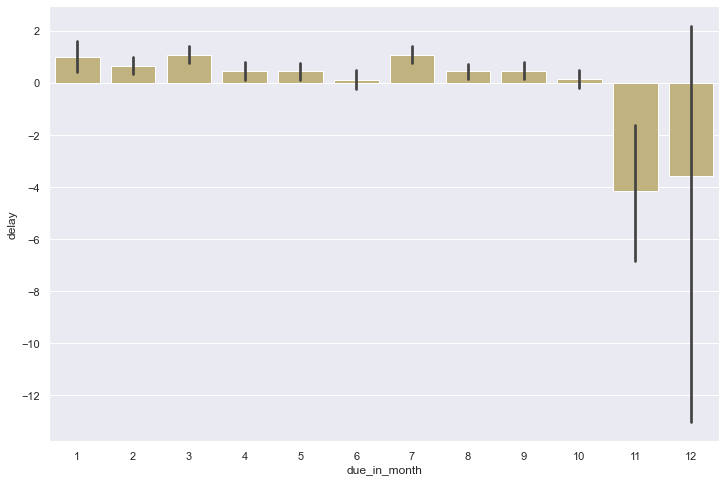

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


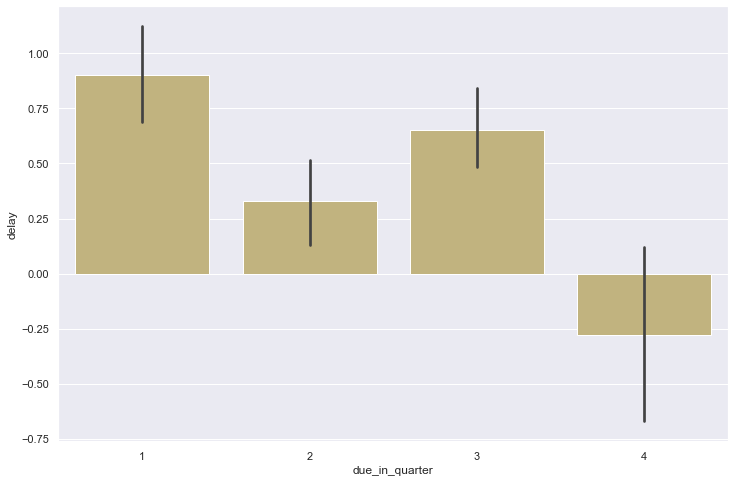

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


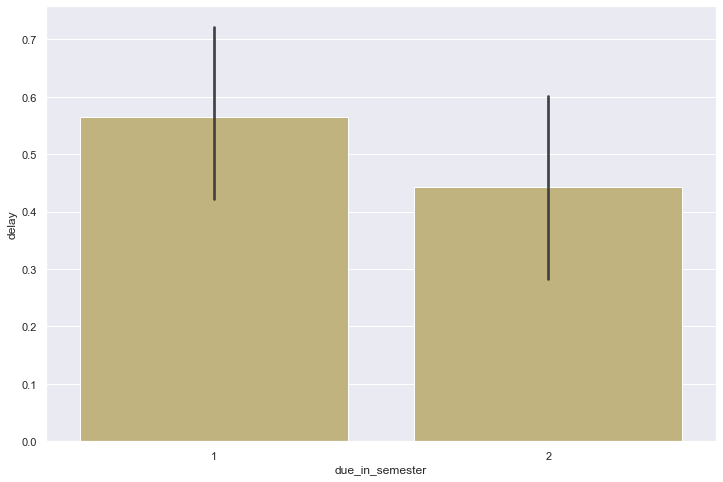

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


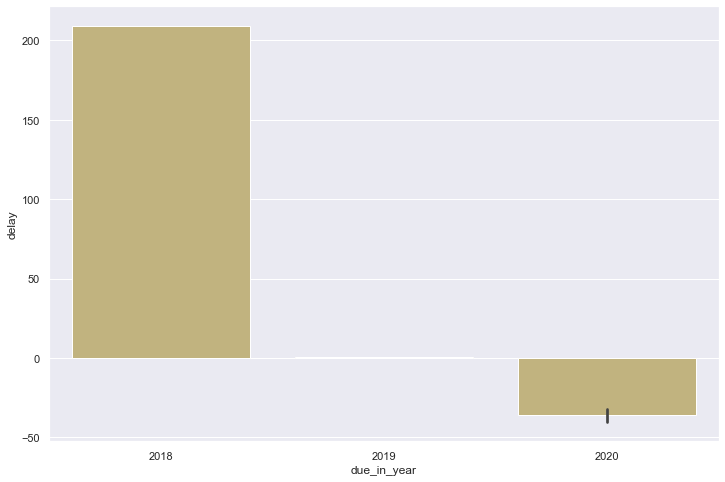

In [ ]:
#Plotting the barplot to look at the pattern of delay in month,quarter,semester,and in year.
x=['due_in_month','due_in_quarter','due_in_semester','due_in_year']
for col in x:
  plt.figure(figsize=(12,8))
  sns.barplot(train[col],train['delay'],color='y')
  plt.xlabel(col)
  plt.ylabel('delay')
  plt.show() 

**From above barplots we can infer following points:-**<br>

  **1. As we can see in november and december delay is negative which means that in these two months invoice is clered before the due date.**<br>

  **2.In september,October,November and December delay is negative i.e delay is cleared before due date.**<br>

  **3.In second semester also, delay is negative.**<br>

  **4.In year 2020 dely is also negative i.e invoice is cleared before due date.**

# Categorical Variable Encoding

### Business_code column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['business_code'] = labelencoder.fit_transform(train['business_code'])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,Others,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,CAD,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,WAL-MAR,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,Others,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,WAL-MAR,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,SA,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['business_code'] = labelencoder.fit_transform(val['business_code'])

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['business_code'] = labelencoder.fit_transform(test['business_code'])

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['business_code'] = labelencoder.fit_transform(final_test['business_code'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
train['business_code'].value_counts()

1    28249
0     2526
5      438
2      112
3       10
4        1
Name: business_code, dtype: int64

### name_customer column

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['name_customer'] = labelencoder.fit_transform(train['name_customer'])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,CAD,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['name_customer'] = labelencoder.fit_transform(val['name_customer'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['name_customer'] = labelencoder.fit_transform(test['name_customer'])


In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['name_customer'] = labelencoder.fit_transform(final_test['name_customer'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### invoice_currency column

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['invoice_currency'] = labelencoder.fit_transform(train['invoice_currency'])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,0,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['invoice_currency'] = labelencoder.fit_transform(val['invoice_currency'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['invoice_currency'] = labelencoder.fit_transform(test['invoice_currency'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['invoice_currency'] = labelencoder.fit_transform(final_test['invoice_currency'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Business_code_label column

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['business_code_label'] = labelencoder.fit_transform(train['business_code_label'])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,0,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['business_code_label'] = labelencoder.fit_transform(val['business_code_label'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['business_code_label'] = labelencoder.fit_transform(test['business_code_label'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['business_code_label'] = labelencoder.fit_transform(final_test['business_code_label'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Amount_category column

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['amount_category'] = labelencoder.fit_transform(train['amount_category'])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,0,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['amount_category'] = labelencoder.fit_transform(val['amount_category'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['amount_category'] = labelencoder.fit_transform(test['amount_category'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['amount_category'] = labelencoder.fit_transform(final_test['amount_category'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Document type column

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
val['document type'] = labelencoder.fit_transform(val['document type'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['document type'] = labelencoder.fit_transform(train['document type'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
test['document type'] = labelencoder.fit_transform(test['document type'])

In [ ]:
labelencoder = LabelEncoder()

# Assigning numeric values to categories
final_test['document type'] = labelencoder.fit_transform(final_test['document type'])

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Business year has all same value
train['buisness_year'].value_counts()

2019.0    31336
Name: buisness_year, dtype: int64

<AxesSubplot:xlabel='due_in_quarter', ylabel='delay'>

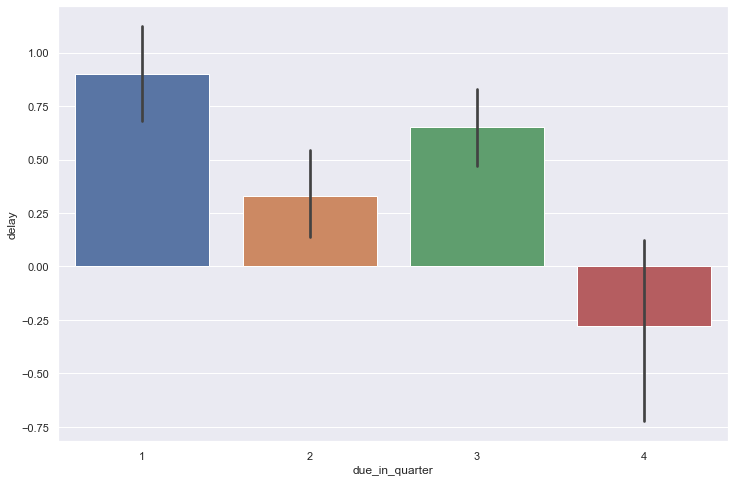

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='due_in_quarter',y='delay',data=train)

> + **We can clearly see in above plot that in 4th quarter(September,October,November,December) companies clears their invoices beore the due date.As delay=clear_date - due_in_date.**

<AxesSubplot:xlabel='due_in_semester', ylabel='delay'>

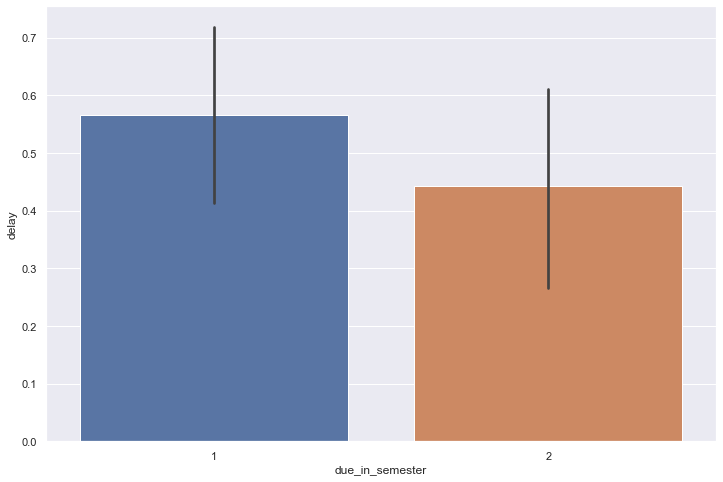

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='due_in_semester',y='delay',data=train)

> + **We can also see above that in the second semester companies clears theirs invoice early as in case of first semester.**

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,due_in_dayofweek,due_in_weekofyear,baseline_create_month,baseline_create_year,baseline_create_quarter,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,0,...,5,44,10,2018,4,2,2,43,10,87.840000
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,2735.430000
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,5731.908667
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,1038.880667
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,1,...,0,3,12,2018,4,2,6,52,15,958.677333


In [ ]:
# Working with doc_create_date
train['doc_create_month']=train['document_create_date.1'].dt.month
train['doc_create_year']=train['document_create_date.1'].dt.year
train['doc_create_quarter']=train['document_create_date.1'].dt.quarter
train['doc_create_semester'] = np.where(train.doc_create_quarter.isin([1,2]),1,2)
train['doc_create_dayofweek']=train['document_create_date.1'].dt.dayofweek
train['doc_create_weekofyear']=train['document_create_date.1'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Working with doc_create_date
val['doc_create_month']=val['document_create_date.1'].dt.month
val['doc_create_year']=val['document_create_date.1'].dt.year
val['doc_create_quarter']=val['document_create_date.1'].dt.quarter
val['doc_create_semester'] = np.where(val.doc_create_quarter.isin([1,2]),1,2)
val['doc_create_dayofweek']=val['document_create_date.1'].dt.dayofweek
val['doc_create_weekofyear']=val['document_create_date.1'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Working with doc_create_date
test['doc_create_month']=test['document_create_date.1'].dt.month
test['doc_create_year']=test['document_create_date.1'].dt.year
test['doc_create_quarter']=test['document_create_date.1'].dt.quarter
test['doc_create_semester'] = np.where(test.doc_create_quarter.isin([1,2]),1,2)
test['doc_create_dayofweek']=test['document_create_date.1'].dt.dayofweek
test['doc_create_weekofyear']=test['document_create_date.1'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
# Working with doc_create_date
final_test['doc_create_month']=final_test['document_create_date.1'].dt.month
final_test['doc_create_year']=final_test['document_create_date.1'].dt.year
final_test['doc_create_quarter']=final_test['document_create_date.1'].dt.quarter
final_test['doc_create_semester'] = np.where(final_test.doc_create_quarter.isin([1,2]),1,2)
final_test['doc_create_dayofweek']=final_test['document_create_date.1'].dt.dayofweek
final_test['doc_create_weekofyear']=final_test['document_create_date.1'].dt.weekofyear

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,...,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay,doc_create_month,doc_create_year,doc_create_quarter,doc_create_semester,doc_create_dayofweek,doc_create_weekofyear
17648,0,0140104409,4,2019-05-31,2019.0,9.500000e+09,2019-03-29,2018-10-24,2018-11-03,0,...,2,43,10,87.840000,10,2018,4,2,2,43
19289,1,0200769623,7,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,1,...,6,52,15,2735.430000,12,2018,4,2,6,52
23558,1,0200707822,4,2019-01-14,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,1,...,6,52,15,5731.908667,12,2018,4,2,6,52
38917,1,0200769623,7,2019-01-10,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,1,...,6,52,15,1038.880667,12,2018,4,2,6,52
30664,1,0200759878,5,2019-01-15,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,1,...,6,52,15,958.677333,12,2018,4,2,6,52


In [ ]:
train.dtypes

business_code                          int32
cust_number                           object
name_customer                          int32
clear_date                    datetime64[ns]
buisness_year                        float64
doc_id                               float64
posting_date                  datetime64[ns]
document_create_date.1        datetime64[ns]
due_in_date                   datetime64[ns]
invoice_currency                       int32
document type                          int32
posting_id                           float64
total_open_amount                    float64
baseline_create_date          datetime64[ns]
cust_payment_terms                     int64
isOpen                                 int32
delay                                  int32
amount_category                        int64
business_code_numeric                  int32
business_code_label                    int32
posting_month                          int64
posting_year                           int64
posting_qu

# Feature Selection

> + **Many of features in our dataset are constant and quasi-constant features.These features do not contribute towards the model training,so we can remove them.**

In [ ]:
# Converting "buisiness_year","posting_id",and "doc_id" to integer type

In [ ]:
# Converting "buisiness_year","posting_id",and "doc_id" to integer type on train set

train['buisness_year']=train['buisness_year'].astype(str).astype(float).astype(int)
train['posting_id']=train['posting_id'].astype(str).astype(float).astype(int)
train['doc_id']=train['doc_id'].astype(str).astype(float).astype(int)

In [ ]:
# Converting "buisiness_year","posting_id",and "doc_id" to integer type om val set

val['buisness_year']=val['buisness_year'].astype(str).astype(float).astype(int)
val['posting_id']=val['posting_id'].astype(str).astype(float).astype(int)
val['doc_id']=val['doc_id'].astype(str).astype(float).astype(int)

In [ ]:
# Converting "buisiness_year","posting_id",and "doc_id" to integer type on test set

test['buisness_year']=test['buisness_year'].astype(str).astype(float).astype(int)
test['posting_id']=test['posting_id'].astype(str).astype(float).astype(int)
test['doc_id']=test['doc_id'].astype(str).astype(float).astype(int)

In [ ]:
# Converting "buisiness_year","posting_id",and "doc_id" to integer type on test set

final_test['buisness_year']=final_test['buisness_year'].astype(str).astype(float).astype(int)
final_test['posting_id']=final_test['posting_id'].astype(str).astype(float).astype(int)
final_test['doc_id']=final_test['doc_id'].astype(str).astype(float).astype(int)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCop

In [ ]:
# taking only integer and float datatype on train set
types=["int32","int64","float64"]
train=train.select_dtypes(include=types)

In [ ]:
# taking only integer and float datatype on val set
types=["int32","int64","float64"]
val=val.select_dtypes(include=types)

In [ ]:
# taking only integer and float datatype on test set 
types=["int32","int64","float64"]
test=test.select_dtypes(include=types)

In [ ]:
# taking only integer and float datatype on test set 
types=["int32","int64","float64"]
final_test=final_test.select_dtypes(include=types)

In [ ]:
train.dtypes

business_code                   int32
name_customer                   int32
buisness_year                   int32
doc_id                          int32
invoice_currency                int32
document type                   int32
posting_id                      int32
total_open_amount             float64
cust_payment_terms              int64
isOpen                          int32
delay                           int32
amount_category                 int64
business_code_numeric           int32
business_code_label             int32
posting_month                   int64
posting_year                    int64
posting_quarter                 int64
posting_semester                int32
posting_dayofweek               int64
due_in_month                    int64
due_in_year                     int64
due_in_quarter                  int64
due_in_semester                 int32
due_in_dayofweek                int64
due_in_weekofyear               int64
baseline_create_month           int64
baseline_cre

## Removing constant feature

In [ ]:
# importing variance threshold
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#making an object of variance threshold
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter.fit(train)

VarianceThreshold(threshold=0)

In [ ]:
# Getting  the count of columns that are not constant
len(train.columns[constant_filter.get_support()])

36

In [ ]:
# Getting Count of constant columns

constant_columns = [column for column in train.columns
                    if column not in train.columns[constant_filter.get_support()]]

print(len(constant_columns))

3


In [ ]:
# Getting name of constant columns
for column in constant_columns:
    print(column)

buisness_year
posting_id
isOpen


In [ ]:
# Droping constant columns from train set
train.drop(labels=constant_columns, axis=1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# We will also drop the same column on val 
val.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
# We will also drop the same column on val
test.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
# We will also drop the same column on val
final_test.drop(labels=constant_columns, axis=1, inplace=True)

## Removing Quasi-Constant Features Using Variance Threshold

> + **There is no rule as to what should be the threshold for the variance of quasi-constant features. However, as a rule of thumb, remove those quasi-constant features that have more than 99% similar values for the output observations.**

In [ ]:
#Making objects
qconstant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
qconstant_filter.fit(train)

VarianceThreshold(threshold=0.01)

In [ ]:
#Getting the counts of constant columns that are not quasi-contant
len(train.columns[qconstant_filter.get_support()])

31

In [ ]:
#Getting the count of quasi-constant columns 
qconstant_columns = [column for column in train.columns
                    if column not in train.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

5


In [ ]:
#Getting the name  of quasi constant columns
for column in qconstant_columns:
    print(column)

document type
posting_year
due_in_year
baseline_create_year
doc_create_year


In [ ]:
# Droping quasi-constant columns from train set
train.drop(labels=qconstant_columns, axis=1, inplace=True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
val.dtypes

business_code                   int32
name_customer                   int32
doc_id                          int32
invoice_currency                int32
document type                   int32
total_open_amount             float64
cust_payment_terms              int64
delay                           int32
amount_category                 int64
business_code_numeric           int32
business_code_label             int32
posting_month                   int64
posting_year                    int64
posting_quarter                 int64
posting_semester                int32
posting_dayofweek               int64
due_in_month                    int64
due_in_year                     int64
due_in_quarter                  int64
due_in_semester                 int32
due_in_dayofweek                int64
due_in_weekofyear               int64
baseline_create_month           int64
baseline_create_year            int64
baseline_create_quarter         int64
baseline_create_semester        int32
baseline_cre

In [ ]:
# Droping quasi-constant columns from val set
val.drop(labels=qconstant_columns, axis=1, inplace=True)

In [ ]:
# Droping quasi-constant columns from train set
test.drop(labels=qconstant_columns, axis=1, inplace=True)

In [ ]:
# Droping quasi-constant columns from train set
final_test.drop(labels=qconstant_columns, axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31336 entries, 17648 to 1843
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               31336 non-null  int32  
 1   name_customer               31336 non-null  int32  
 2   doc_id                      31336 non-null  int32  
 3   invoice_currency            31336 non-null  int32  
 4   total_open_amount           31336 non-null  float64
 5   cust_payment_terms          31336 non-null  int64  
 6   delay                       31336 non-null  int32  
 7   amount_category             31336 non-null  int64  
 8   business_code_numeric       31336 non-null  int32  
 9   business_code_label         31336 non-null  int32  
 10  posting_month               31336 non-null  int64  
 11  posting_quarter             31336 non-null  int64  
 12  posting_semester            31336 non-null  int32  
 13  posting_dayofweek           

In [ ]:
train['delay']

17648    209
19289     -4
23558      0
38917     -4
30664      1
        ... 
8415       0
11028     -5
12399     -5
27841      3
1843      -5
Name: delay, Length: 31336, dtype: int32

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 32072 to 30432
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               6614 non-null   int32  
 1   name_customer               6614 non-null   int32  
 2   doc_id                      6614 non-null   int32  
 3   invoice_currency            6614 non-null   int32  
 4   total_open_amount           6614 non-null   float64
 5   cust_payment_terms          6614 non-null   int64  
 6   delay                       6614 non-null   int32  
 7   amount_category             6614 non-null   int64  
 8   business_code_numeric       6614 non-null   int32  
 9   business_code_label         6614 non-null   int32  
 10  posting_month               6614 non-null   int64  
 11  posting_quarter             6614 non-null   int64  
 12  posting_semester            6614 non-null   int32  
 13  posting_dayofweek           

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 20406 to 3675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               6714 non-null   int32  
 1   name_customer               6714 non-null   int32  
 2   doc_id                      6714 non-null   int32  
 3   invoice_currency            6714 non-null   int32  
 4   total_open_amount           6714 non-null   float64
 5   cust_payment_terms          6714 non-null   int64  
 6   delay                       6714 non-null   int32  
 7   amount_category             6714 non-null   int64  
 8   business_code_numeric       6714 non-null   int32  
 9   business_code_label         6714 non-null   int32  
 10  posting_month               6714 non-null   int64  
 11  posting_quarter             6714 non-null   int64  
 12  posting_semester            6714 non-null   int32  
 13  posting_dayofweek           6

In [ ]:
train.corr()['delay'].sort_values(ascending=False)

delay                         1.000000
business_code_numeric         0.150256
amount_category               0.046247
money_per_day_to_pay          0.042456
total_open_amount             0.030662
due_in_dayofweek              0.023224
business_code                 0.023152
baseline_create_dayofweek     0.009337
posting_dayofweek             0.005253
doc_create_dayofweek          0.004507
due_in_semester              -0.005988
baseline_create_quarter      -0.010334
doc_create_quarter           -0.012117
baseline_create_weekofyear   -0.012340
baseline_create_semester     -0.012802
doc_create_semester          -0.013884
posting_quarter              -0.014159
baseline_create_month        -0.014165
posting_semester             -0.015254
doc_create_weekofyear        -0.015442
doc_create_month             -0.015527
posting_month                -0.017105
due_in_quarter               -0.020964
cust_payment_terms           -0.022830
due_in_month                 -0.023171
due_in_weekofyear        

<AxesSubplot:>

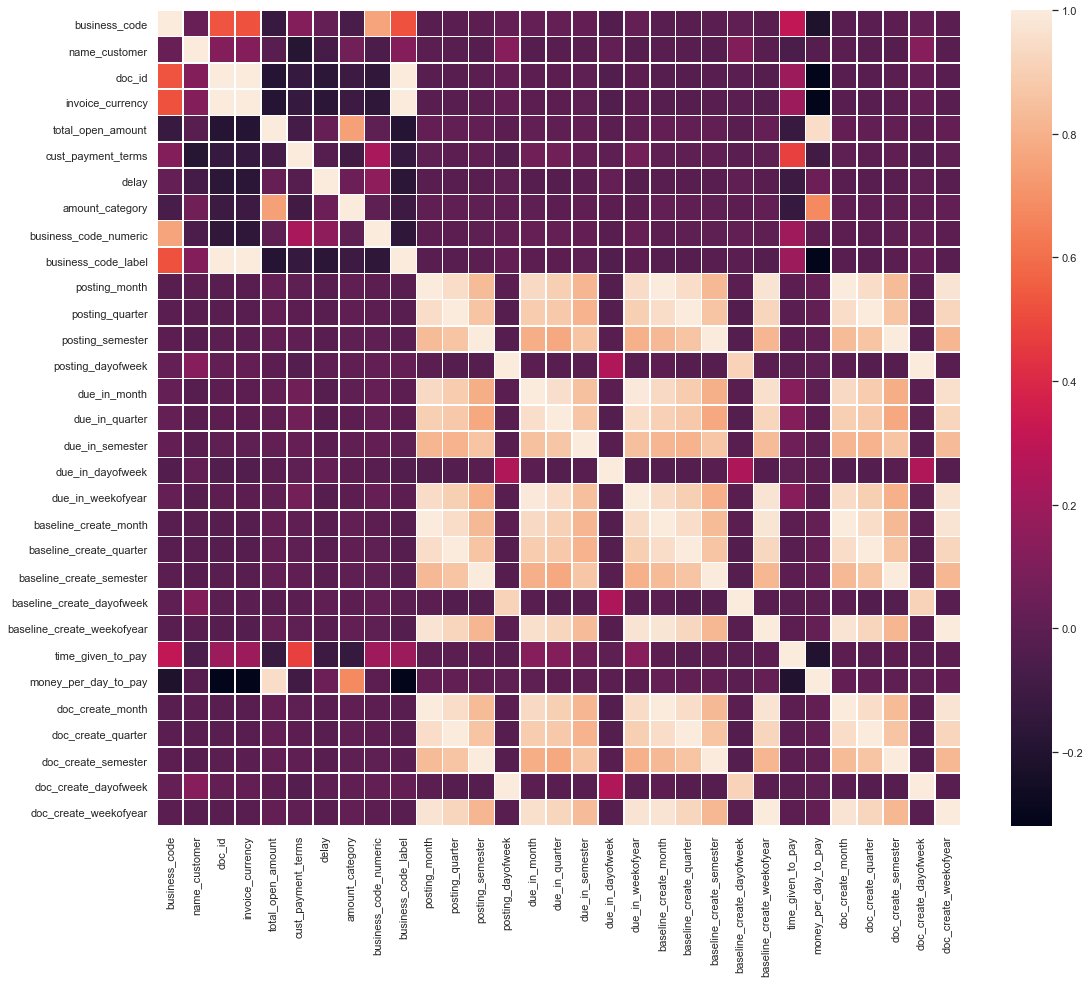

In [ ]:
plt.figure(figsize=(18,15))
sns.set_theme(style="white")
sns.heatmap(train.corr(),linewidths=.5)

In [ ]:
# Dropping doc_id columns from the train,val and test set
train.drop('doc_id',inplace=True,axis=1)
val.drop('doc_id',inplace=True,axis=1)
test.drop('doc_id',inplace=True,axis=1)
final_test.drop('doc_id',inplace=True,axis=1)

In [ ]:
def FFS(X,y):
    from sklearn.ensemble import RandomForestRegressor
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    import xgboost
    regressor=xgboost.XGBRegressor()
    clf =RandomForestRegressor()
    # Sequential Forward Selection(sfs)
    sfs = SFS(regressor,
              k_features=(3,25),
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(X, y)#doing the FFS
    return sfs.k_feature_names_

In [ ]:
train.columns

Index(['business_code', 'name_customer', 'invoice_currency',
       'total_open_amount', 'cust_payment_terms', 'delay', 'amount_category',
       'business_code_numeric', 'business_code_label', 'posting_month',
       'posting_quarter', 'posting_semester', 'posting_dayofweek',
       'due_in_month', 'due_in_quarter', 'due_in_semester', 'due_in_dayofweek',
       'due_in_weekofyear', 'baseline_create_month', 'baseline_create_quarter',
       'baseline_create_semester', 'baseline_create_dayofweek',
       'baseline_create_weekofyear', 'time_given_to_pay',
       'money_per_day_to_pay', 'doc_create_month', 'doc_create_quarter',
       'doc_create_semester', 'doc_create_dayofweek', 'doc_create_weekofyear'],
      dtype='object')

In [ ]:
x_train=train.drop('delay',axis=1)

In [ ]:
x_train

,business_code,name_customer,invoice_currency,total_open_amount,cust_payment_terms,amount_category,business_code_numeric,business_code_label,posting_month,posting_quarter,...,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay,doc_create_month,doc_create_quarter,doc_create_semester,doc_create_dayofweek,doc_create_weekofyear
17648,0,4,0,878.40,2,0,2,0,3,1,...,2,2,43,10,87.840000,10,4,2,2,43
19289,1,7,1,41031.45,1,1,1,1,12,4,...,2,6,52,15,2735.430000,12,4,2,6,52
23558,1,4,1,85978.63,0,1,1,1,12,4,...,2,6,52,15,5731.908667,12,4,2,6,52
38917,1,7,1,15583.21,1,1,1,1,12,4,...,2,6,52,15,1038.880667,12,4,2,6,52
30664,1,5,1,14380.16,1,1,1,1,12,4,...,2,6,52,15,958.677333,12,4,2,6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,1,4,1,10960.29,3,1,1,1,10,4,...,2,1,41,15,730.686000,10,4,2,1,41
11028,1,7,1,47957.39,1,1,1,1,10,4,...,2,1,41,15,3197.159333,10,4,2,1,41
12399,1,7,1,4375.84,1,0,1,1,10,4,...,2,1,41,15,291.722667,10,4,2,1,41
27841,5,4,1,20782.80,4,1,13,1,10,4,...,2,1,41,45,461.840000,10,4,2,1,41


In [ ]:
y_train=train['delay']

In [ ]:
y_train

17648    209
19289     -4
23558      0
38917     -4
30664      1
        ... 
8415       0
11028     -5
12399     -5
27841      3
1843      -5
Name: delay, Length: 31336, dtype: int32

In [ ]:
features=FFS(x_train,y_train)#features selected by FFS

In [ ]:
selected_features=list(features)

In [ ]:
selected_features

['business_code',
 'name_customer',
 'invoice_currency',
 'cust_payment_terms',
 'amount_category',
 'business_code_numeric',
 'business_code_label',
 'baseline_create_dayofweek',
 'time_given_to_pay',
 'doc_create_dayofweek']

In [ ]:
selected_features=['business_code',
 'name_customer',
 'invoice_currency',
 'cust_payment_terms',
 'amount_category',
 'business_code_numeric',
 'business_code_label',
 'baseline_create_dayofweek',
 'time_given_to_pay',
 'doc_create_dayofweek']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31336 entries, 17648 to 1843
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               31336 non-null  int32  
 1   name_customer               31336 non-null  int32  
 2   invoice_currency            31336 non-null  int32  
 3   total_open_amount           31336 non-null  float64
 4   cust_payment_terms          31336 non-null  int64  
 5   delay                       31336 non-null  int32  
 6   amount_category             31336 non-null  int64  
 7   business_code_numeric       31336 non-null  int32  
 8   business_code_label         31336 non-null  int32  
 9   posting_month               31336 non-null  int64  
 10  posting_quarter             31336 non-null  int64  
 11  posting_semester            31336 non-null  int32  
 12  posting_dayofweek           31336 non-null  int64  
 13  due_in_month                

In [ ]:
train.dtypes==val.dtypes

business_code                 True
name_customer                 True
invoice_currency              True
total_open_amount             True
cust_payment_terms            True
delay                         True
amount_category               True
business_code_numeric         True
business_code_label           True
posting_month                 True
posting_quarter               True
posting_semester              True
posting_dayofweek             True
due_in_month                  True
due_in_quarter                True
due_in_semester               True
due_in_dayofweek              True
due_in_weekofyear             True
baseline_create_month         True
baseline_create_quarter       True
baseline_create_semester      True
baseline_create_dayofweek     True
baseline_create_weekofyear    True
time_given_to_pay             True
money_per_day_to_pay          True
doc_create_month              True
doc_create_quarter            True
doc_create_semester           True
doc_create_dayofweek

In [ ]:
val.dtypes==train.dtypes

business_code                 True
name_customer                 True
invoice_currency              True
total_open_amount             True
cust_payment_terms            True
delay                         True
amount_category               True
business_code_numeric         True
business_code_label           True
posting_month                 True
posting_quarter               True
posting_semester              True
posting_dayofweek             True
due_in_month                  True
due_in_quarter                True
due_in_semester               True
due_in_dayofweek              True
due_in_weekofyear             True
baseline_create_month         True
baseline_create_quarter       True
baseline_create_semester      True
baseline_create_dayofweek     True
baseline_create_weekofyear    True
time_given_to_pay             True
money_per_day_to_pay          True
doc_create_month              True
doc_create_quarter            True
doc_create_semester           True
doc_create_dayofweek

# Hyperparameter Tuning

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
# Selecting parameters for randomized search

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
val['time_given_to_pay']

32072    20
13028    15
16211    15
8687     10
36378    10
         ..
27065    15
18911    15
29326    15
36575    10
30432    15
Name: time_given_to_pay, Length: 6614, dtype: int64

## RandomizedSearchcv

In [ ]:
#importing randomizedsearchcv

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
#selected x_val and y_val respectively
x_val=val[selected_features]
y_val=val['delay']

In [ ]:
#fitting to randomizedsearchcv
random_cv.fit(x_val,y_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  9.1min finished


[14:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
#Finding the best parameters
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

> +  **Now we have Tune our model ,it's time for joining our validation and training set.**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31336 entries, 17648 to 1843
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               31336 non-null  int32  
 1   name_customer               31336 non-null  int32  
 2   invoice_currency            31336 non-null  int32  
 3   total_open_amount           31336 non-null  float64
 4   cust_payment_terms          31336 non-null  int64  
 5   delay                       31336 non-null  int32  
 6   amount_category             31336 non-null  int64  
 7   business_code_numeric       31336 non-null  int32  
 8   business_code_label         31336 non-null  int32  
 9   posting_month               31336 non-null  int64  
 10  posting_quarter             31336 non-null  int64  
 11  posting_semester            31336 non-null  int32  
 12  posting_dayofweek           31336 non-null  int64  
 13  due_in_month                

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 32072 to 30432
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_code               6614 non-null   int32  
 1   name_customer               6614 non-null   int32  
 2   invoice_currency            6614 non-null   int32  
 3   total_open_amount           6614 non-null   float64
 4   cust_payment_terms          6614 non-null   int64  
 5   delay                       6614 non-null   int32  
 6   amount_category             6614 non-null   int64  
 7   business_code_numeric       6614 non-null   int32  
 8   business_code_label         6614 non-null   int32  
 9   posting_month               6614 non-null   int64  
 10  posting_quarter             6614 non-null   int64  
 11  posting_semester            6614 non-null   int32  
 12  posting_dayofweek           6614 non-null   int64  
 13  due_in_month                

# Model Training And Evaluation

1.**XGBRegressor**

In [ ]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score_test = []
Algorithm_test = []
RMSE_score_test=[]

In [ ]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score_val = []
Algorithm_val = []
RMSE_score_val=[]

In [ ]:
Algorithm_test.append('XGBRegresor')
Algorithm_val.append('XGBRegressor')

In [ ]:
# Taking features which are selected from the feature selection
x_train=train[selected_features]
y_train=train['delay']

In [ ]:
# Creating the model on the parameters selected by randomized search cv
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#Fitting the model on train dataset.
regressor.fit(x_train,y_train)

[14:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
# Selecting features for test set on which our model will be tested.
x_test=test[selected_features]
y_test=test['delay']

In [ ]:
#making prediction 
prediction=regressor.predict(x_test)

In [ ]:
prediction

array([-0.38652658,  2.021411  ,  1.0131629 , ...,  1.3044722 ,
        7.1960335 ,  0.61742616], dtype=float32)

In [ ]:
prediction[0:6].round()

array([-0.,  2.,  1.,  1., -2., -2.], dtype=float32)

In [ ]:
y_test.head(6)

20406    1
38828    0
38397    0
796      1
37798   -3
4017    -3
Name: delay, dtype: int32

In [ ]:
prediction=np.around(prediction)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
MSE_Score_test.append(mean_squared_error(prediction,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(prediction,y_test)))

## prediction On val set

In [ ]:
prediction_val=regressor.predict(x_val)

In [ ]:
prediction_val=np.around(prediction_val)

In [ ]:
print(mean_squared_error(prediction_val,y_val))


25.851073480495916


In [ ]:
MSE_Score_val.append(mean_squared_error(prediction_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(prediction_val,y_val)))

**2.Random ForestRegressor**

In [ ]:
Algorithm_test.append('Random Forest Regressor')
Algorithm_val.append('Random Forest Regressor')

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
#implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(x_val, y_val)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   40.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 13.1min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed: 21.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
 #Finding best parameters 
rf_Grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Building RandomForestRegressor Model
rf_model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#fitting the model
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=200)

In [ ]:
#making predictions
rf_pred=rf_model.predict(x_test)

In [ ]:
rf_pred[0:6]

array([-1.42603177,  1.42202823, -1.25481617,  1.36418095, -2.71611076,
       -2.71611076])

In [ ]:
y_test.head(6)

20406    1
38828    0
38397    0
796      1
37798   -3
4017    -3
Name: delay, dtype: int32

In [ ]:
rf_pred=np.around(rf_pred)

In [ ]:
MSE_Score_test.append(mean_squared_error(rf_pred,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(rf_pred,y_test)))

## Prediction on val set

In [ ]:
#making predictions
rf_pred_val=rf_model.predict(x_val)

In [ ]:
rf_pred_val=np.around(rf_pred_val)

In [ ]:
print(mean_squared_error(rf_pred_val,y_val))

28.299818566676745


In [ ]:
MSE_Score_val.append(mean_squared_error(rf_pred_val,y_val))
RMSE_score_val.append(np.sqrt(mean_squared_error(rf_pred_val,y_val)))

# **3.Decision Tree Regressor.**

In [ ]:
Algorithm_test.append('Decision Tree Regressor')
Algorithm_val.append('Decision Tree Regressor')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
}

In [ ]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5,verbose=1,n_jobs=-1)

In [ ]:
grid_cv_dtr.fit(x_val,y_val)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                      

In [ ]:
grid_cv_dtr.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtr_model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=40,
                      min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [ ]:
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=20, min_samples_leaf=20,
                      min_samples_split=40)

In [ ]:
dtr_predict=dtr_model.predict(x_test)

In [ ]:
dtr_predict=np.around(dtr_predict)

In [ ]:
mean_squared_error(dtr_predict,y_test)

71.0856419422103

In [ ]:
MSE_Score_test.append(mean_squared_error(dtr_predict,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(dtr_predict,y_test)))

# Prediction on val set

In [ ]:
dtr_predict_val=dtr_model.predict(x_val)

In [ ]:
dtr_predict_val=np.around(dtr_predict_val)

In [ ]:
print(mean_squared_error(dtr_predict_val,y_val))


25.56198971877835


In [ ]:
MSE_Score_val.append(mean_squared_error(dtr_predict_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(dtr_predict_val,y_val)))

## **4.Support Vector Regressor**

In [ ]:
Algorithm_test.append("Support Vector Regressor")
Algorithm_val.append("Support Vector Regressor")

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
svr_predict=svr.predict(x_test)
mean_squared_error(svr_predict,y_test)

82.96785553404634

In [ ]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score_test.append(mean_squared_error(svr_predict,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(svr_predict,y_test)))

## Prediction on val set

In [ ]:
svr_predict_val=svr.predict(x_val)

In [ ]:
svr_predict_val=np.around(svr_predict_val)

In [ ]:
print(mean_squared_error(svr_predict_val,y_val))


27.655579074690053


In [ ]:
MSE_Score_val.append(mean_squared_error(svr_predict_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(svr_predict_val,y_val)))

# **5.Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
Algorithm_test.append('Lasso Regression')
Algorithm_val.append('Lasso Regression')

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
lasso_regressor.fit(x_val,y_val)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53138.797453646606, tolerance: 13.30407250047252
  positive)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57765.028790454395, tolerance: 14.525259648459675
  positive)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68503.586484424, tolerance: 17.24244048384046
  positive)
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:53

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_estimator_

Lasso(alpha=1e-08)

In [ ]:
lasso=Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
lasso.fit(x_train,y_train)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1508166.1512534358, tolerance: 321.8173364309422
  positive)


Lasso(alpha=1e-15)

In [ ]:
predict_lasso=lasso.predict(x_test)


In [ ]:
print(mean_squared_error(predict_lasso,y_test))


80.25888770076773


In [ ]:
print("root mean square error",np.sqrt(mean_squared_error(predict_lasso,y_test)))

root mean square error 8.958732482933494


In [ ]:
MSE_Score_test.append(mean_squared_error(predict_lasso,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(predict_lasso,y_test)))

## Prediction on val set

In [ ]:
predict_lasso_val=lasso.predict(x_val)

In [ ]:
predict_lasso_val=np.around(predict_lasso_val)

In [ ]:
print(mean_squared_error(predict_lasso_val,y_val))


26.865890535228303


In [ ]:
MSE_Score_val.append(mean_squared_error(predict_lasso_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(predict_lasso_val,y_val)))

# **6.Linear Regression**

In [ ]:

from sklearn.linear_model import LinearRegression



In [ ]:
Algorithm_test.append("Linear Regression")
Algorithm_val.append("Linear Regression")

In [ ]:

lin_regressor=LinearRegression()

In [ ]:
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
lin_predict=lin_regressor.predict(x_test)

In [ ]:
print(mean_squared_error(lin_predict,y_test))


80.27152367001332


In [ ]:
print("root mean square error",np.sqrt(mean_squared_error(lin_predict,y_test)))

root mean square error 8.959437687154999


In [ ]:
MSE_Score_test.append(mean_squared_error(lin_predict,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(lin_predict,y_test)))

## Prediction on val set

In [ ]:
lin_predict_val=lin_regressor.predict(x_val)

In [ ]:
lin_predict_val=np.around(lin_predict_val)

In [ ]:
print(mean_squared_error(lin_predict_val,y_val))


26.884336256425765


In [ ]:
MSE_Score_val.append(mean_squared_error(lin_predict_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(lin_predict_val,y_val)))

# **7.Ridge Regression**

In [ ]:
Algorithm_test.append("Ridge Regression")
Algorithm_val.append("Ridge Regression")

In [ ]:

from sklearn.linear_model import Ridge

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}


In [ ]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
ridge_regressor.fit(x_val,y_val)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=0.01)

In [ ]:
ridge=Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [ ]:
ridge_predict=ridge.predict(x_test)

In [ ]:
print(mean_squared_error(ridge_predict,y_test))


80.18585631563418


In [ ]:
MSE_Score_test.append(mean_squared_error(ridge_predict,y_test))


In [ ]:
RMSE_score_test.append(np.sqrt(mean_squared_error(ridge_predict,y_test)))

## Prediction on val set

In [ ]:
ridge_predict_val=ridge.predict(x_val)

In [ ]:
ridge_predict_val=np.around(ridge_predict_val)

In [ ]:
print(mean_squared_error(ridge_predict_val,y_val))


27.224372543090414


In [ ]:
MSE_Score_val.append(mean_squared_error(ridge_predict_val,y_val))

RMSE_score_val.append(np.sqrt(mean_squared_error(ridge_predict_val,y_val)))

# **Comaparison Of The Model Performance**

In [ ]:
comparison_on_test = pd.DataFrame(list(zip(Algorithm_test, MSE_Score_test,RMSE_score_test)), columns = ['Algorithm', 'MSE_Score','RMSE_score'])

In [ ]:
comparison_on_test

,Algorithm,MSE_Score,RMSE_score
0,XGBRegresor,70.697498,8.408180
1,Random Forest Regressor,74.564194,8.635056
2,Decision Tree Regressor,71.085642,8.431230
3,Support Vector Regressor,82.967856,9.108669
4,Lasso Regression,80.258888,8.958732
5,Linear Regression,80.271524,8.959438
6,Ridge Regression,80.185856,8.954656


In [ ]:
comparison_on_val = pd.DataFrame(list(zip(Algorithm_val, MSE_Score_val,RMSE_score_val)), columns = ['Algorithm', 'MSE_Score','RMSE_score'])

In [ ]:
comparison_on_val

,Algorithm,MSE_Score,RMSE_score
0,XGBRegressor,25.851073,5.084395
1,Random Forest Regressor,28.299819,5.319757
2,Decision Tree Regressor,25.561990,5.055887
3,Support Vector Regressor,27.655579,5.258857
4,Lasso Regression,26.865891,5.183232
5,Linear Regression,26.884336,5.185011
6,Ridge Regression,27.224373,5.217698


> + **As we can see that XGBRegressor performs well both in case of test and validation data so we will use XGBRegressor as our final model.**

In [ ]:
#finak_test which has clear date value as null value
final_test.head()

,business_code,name_customer,invoice_currency,total_open_amount,cust_payment_terms,amount_category,business_code_numeric,business_code_label,posting_month,posting_quarter,...,baseline_create_semester,baseline_create_dayofweek,baseline_create_weekofyear,time_given_to_pay,money_per_day_to_pay,doc_create_month,doc_create_quarter,doc_create_semester,doc_create_dayofweek,doc_create_weekofyear
45556,1,4,1,105359.17,0,2,1,1,4,2,...,1,1,17,15,7023.944667,4,2,1,1,17
45557,1,4,1,153289.41,0,2,1,1,5,2,...,1,0,19,15,10219.294000,5,2,1,0,19
45558,1,7,1,10513.24,1,1,1,1,4,2,...,1,1,17,15,700.882667,4,2,1,1,17
45559,1,4,1,26793.74,4,1,1,1,4,2,...,1,1,15,65,412.211385,4,2,1,1,15
45560,1,1,1,37107.96,4,1,1,1,4,2,...,1,2,15,15,2473.864000,4,2,1,2,15


In [ ]:
# selecting x_features
x_final_test=final_test[selected_features]

In [ ]:
#predicting value
predicted_final_test=regressor.predict(x_final_test)

In [ ]:
predicted_final_test

array([ 0.20941117, -0.02263528, -2.7737753 , ...,  1.3044722 ,
       -1.2942791 ,  2.151619  ], dtype=float32)

In [ ]:
predicted_final_test=np.around(predicted_final_test)

In [ ]:
predicted_final_test

array([ 0., -0., -3., ...,  1., -1.,  2.], dtype=float32)

> + **Adding column for predicted value.**

In [ ]:

final_test_copy['predicted_delay']=predicted_final_test

In [ ]:
final_test_copy['predicted_delay']

45556     0.0
45557    -0.0
45558    -3.0
45559   -12.0
45560    -0.0
         ... 
49995    -1.0
49996     1.0
49997     1.0
49998    -1.0
49999     2.0
Name: predicted_delay, Length: 4444, dtype: float32

In [ ]:
#Checking maximum predicted delay
final_test_copy[final_test_copy['predicted_delay']==final_test_copy['predicted_delay'].max()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,predicted_delay
47125,U013,0140103480,PRIC trust,NaT,2020.0,1.991840e+09,2020-02-28,2020-02-26,2020-02-28,2020-04-13,USD,RV,1.0,44084.04,2020-02-28,NAVF,1,21.0
49952,U013,CC3411,H.J. HEI corp,NaT,2020.0,1.991841e+09,2020-03-06,2020-03-06,2020-03-06,2020-04-20,USD,RV,1.0,13860.51,2020-03-06,NAVF,1,21.0


In [ ]:
#Checking minimum predicted delay
final_test_copy[final_test_copy['predicted_delay']==final_test_copy['predicted_delay'].min()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,predicted_delay
49442,U001,0200794332,COST foundation,NaT,2020.0,1.930623e+09,2020-03-10,2020-03-08,2020-03-10,2020-05-14,USD,RV,1.0,19509.67,2020-03-10,NAGD,1,-21.0


> + **Making function for classifying into aging buckets.**

In [ ]:
# Defining function for bucketisation
def aging_func(x):
    if(x<0):
        return "< 0(clears before due date)"
    elif(x>=0 and x<=15):
        return "0-15 days"
    elif(x>=16 and x<=30):
        return "16-30 days"
    elif(x>=31 and x<=45):
        return "31-45 days"
    elif(x>=46 and x<=60):
        return "46-60 days"
    else:
        return "Greater than 60 days"

In [ ]:
#applying function
final_test_copy['aging_bucket']=final_test_copy['predicted_delay'].apply(aging_func)

In [ ]:
#finding the value_counts of aging bucket.
final_test_copy['aging_bucket'].value_counts()

0-15 days                      2888
< 0(clears before due date)    1552
16-30 days                        4
Name: aging_bucket, dtype: int64

<AxesSubplot:>

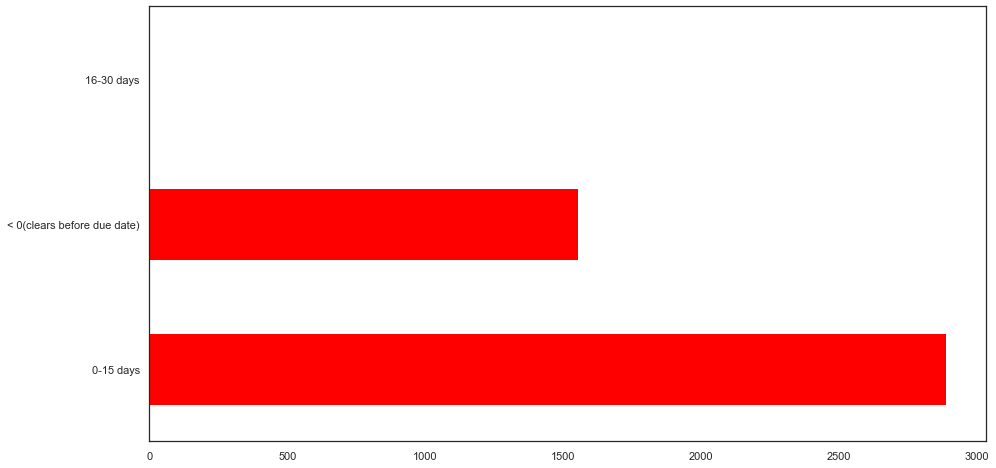

In [ ]:
 
plt.figure(figsize=(15,8))
final_test_copy['aging_bucket'].value_counts().plot(kind='barh',color='red')

> + **Plotting the various buckets of the delay as we can see that most of the delay comes between 0-15 days and then <0(means they clear their invoices before due date) and less for 16-30 days and no delays found for 31-45 days,45-60 days and > 60 days.**

> + **Now we can predict the clear_date of our final test data where the cleardate was null.**

In [ ]:
# clear_date=due_date + predicted_delay
temp = final_test_copy['predicted_delay'].apply(lambda x: pd.Timedelta(x, unit='D'))
final_test_copy['clear_date'] = final_test_copy['due_in_date'] + temp

In [ ]:
final_test_copy.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,predicted_delay,aging_bucket
45556,U001,0200382900,J & J us,2020-05-06,2020.0,1.930808e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,105359.17,2020-04-21,NAA8,1,0.0,0-15 days
45557,U001,0200920735,ALBERT us,2020-05-19,2020.0,1.930852e+09,2020-05-04,2020-05-02,2020-05-04,2020-05-19,USD,RV,1.0,153289.41,2020-05-04,NAA8,1,-0.0,0-15 days
45558,U001,0200769623,WAL-MAR systems,2020-05-03,2020.0,1.930802e+09,2020-04-21,2020-04-19,2020-04-21,2020-05-06,USD,RV,1.0,10513.24,2020-04-21,NAH4,1,-3.0,< 0(clears before due date)
45559,U001,0100052024,CPG trust,2020-05-30,2020.0,1.930758e+09,2020-04-07,2020-04-07,2020-04-07,2020-06-11,USD,RV,1.0,26793.74,2020-04-07,NAGD,1,-12.0,< 0(clears before due date)
45560,U001,0200794332,COST llc,2020-04-23,2020.0,1.930759e+09,2020-04-08,2020-04-07,2020-04-08,2020-04-23,USD,RV,1.0,37107.96,2020-04-08,NAAX,1,-0.0,0-15 days


# **Artificial Neural Network(ANN)**

In [ ]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaling
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(31336, 10)
(6714, 10)


In [ ]:
#importing libries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#Making the ANN Model
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
# Fitting the model
model.fit(x=x_train,y=y_train.values,
          validation_data=(x_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
245/245 [==============================] - 1s 3ms/step - loss: 112.4245 - val_loss: 77.6207
Epoch 2/100
245/245 [==============================] - 1s 2ms/step - loss: 97.2004 - val_loss: 75.8833
Epoch 3/100
245/245 [==============================] - 1s 2ms/step - loss: 92.2789 - val_loss: 78.4627
Epoch 4/100
245/245 [==============================] - 1s 2ms/step - loss: 99.0146 - val_loss: 74.3318
Epoch 5/100
245/245 [==============================] - 1s 2ms/step - loss: 94.4829 - val_loss: 77.4679
Epoch 6/100
245/245 [==============================] - 1s 2ms/step - loss: 88.0756 - val_loss: 77.2813
Epoch 7/100
245/245 [==============================] - 1s 2ms/step - loss: 86.9594 - val_loss: 74.6777
Epoch 8/100
245/245 [==============================] - 1s 2ms/step - loss: 91.1069 - val_loss: 76.9446
Epoch 9/100
245/245 [==============================] - 1s 2ms/step - loss: 92.0182 - val_loss: 75.8751
Epoch 10/100
245/245 [==============================] - 1s 2ms/step - lo

> + **As we can see that ANN is giving Mean_squared_error of 74.34.**

<font color = "red" font size="7">Thank You</font>